# 读取数据

In [1]:
from gspan_mining.config import parser
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
from random import random
import sys

import numpy as np
import pandas as pd


import random 
from tqdm import tqdm

In [2]:
import os
os.getcwd()

'/Users/tangting/Project/gSpan-master'

# 1. 生成 Vertex 数据集

In [18]:
vertex_count = 1000
origin_ids = []
int_fetaures = []
float_fetaures = []
node_label_0 = []
node_label_1 = []
for i in range(vertex_count):
    origin_id = random.randint(1000000,100000000)
    if origin_id not in origin_ids:
        origin_ids.append(origin_id)
        int_fetaures.append([random.randint(10,100),random.randint(200,300)])
        float_fetaures.append([random.random()*10,random.random()*2000])
        node_label_0.append(int(random.random()*2))    
        node_label_1.append(int(random.random()*2))



# vertext_tb = pd.DataFrame(data=[origin_ids,int_fetaures,float_fetaures],columns=["origin_id","int_fetaures","float_fetaures"])
vertext_tb = pd.DataFrame({"origin_id" : origin_ids, \
                            "int_fetaures": int_fetaures, \
                            "float_fetaures" :float_fetaures,
                            "node_label_0":node_label_0,\
                           "node_label_1":node_label_1     })
vertext_tb["id"] = vertext_tb.index
vertext_tb.to_csv("data/vertex_data.csv",index=False,header=True)
vertext_tb


,origin_id,int_fetaures,float_fetaures,node_label_0,node_label_1,id
0,34739846,"[62, 236]","[0.532965408309799, 1886.1972562849128]",1,1,0
1,20984969,"[62, 219]","[4.484108535533693, 217.77188471689678]",0,0,1
2,7703965,"[83, 237]","[1.7864144338213284, 1923.6110869578476]",0,1,2
3,25897815,"[43, 229]","[0.9865543471314775, 1612.7506936038205]",1,0,3
4,24175987,"[93, 252]","[0.14756953151753294, 567.0142204119982]",0,0,4
...,...,...,...,...,...,...
995,34929615,"[83, 272]","[6.2224032964718345, 1377.0524113987287]",1,1,995
996,65096340,"[33, 233]","[1.209139344551462, 1836.6983165401982]",1,0,996
997,76469014,"[83, 204]","[4.536849436879709, 1825.565261937304]",1,0,997
998,74121010,"[64, 226]","[4.215628095447501, 1705.367175910185]",0,1,998


# 2. 生成 Edge 数据集


In [19]:
vertex_count = len(origin_ids)
edge_count = vertex_count * 10
edge_src_ids = []
edge_dst_ids = []
edge_types = []
for i in range(edge_count):
    src_rand_id = random.randint(0,vertex_count-1)
    dst_rand_id = random.randint(0,vertex_count-1)
    if src_rand_id != dst_rand_id:
        src_id = origin_ids[src_rand_id]
        edge_src_ids.append(src_id)
        dst_id = origin_ids[dst_rand_id]
        edge_dst_ids.append(dst_id)
        edge_types.append(random.randint(0,5))

# vertext_tb = pd.DataFrame(data=[origin_ids,int_fetaures,float_fetaures],columns=["origin_id","int_fetaures","float_fetaures"])
edge_tb = pd.DataFrame({"src_origin_id" : edge_src_ids,"dst_origin_id": edge_dst_ids,"edge_type" :edge_types})

edge_tb.to_csv("data/edge_data.csv",index=False,header=True)


In [20]:

edge_tb_src = edge_tb.merge(vertext_tb[["id","origin_id"]], \
                            left_on="src_origin_id", \
                            right_on="origin_id", \
                            how="left") \
                                [["src_origin_id","dst_origin_id","edge_type","id"]].rename(columns = {"id":"src_id"})

edge_tb_dst = edge_tb_src.merge(vertext_tb[["id","origin_id"]], \
                            left_on="dst_origin_id", \
                            right_on="origin_id", \
                            how="left") \
                                [["src_origin_id","dst_origin_id","edge_type","src_id","id"]].rename(columns = {"id":"dst_id"})

edge_end = edge_tb_dst[["edge_type","src_id","dst_id"]]


edge_end
# edge_tb


,edge_type,src_id,dst_id
0,2,970,635
1,1,270,875
2,4,170,900
3,1,744,198
4,2,896,934
...,...,...,...
9986,3,280,487
9987,0,770,502
9988,1,647,989
9989,2,279,70


# 3.找到 origin_id => subgraph


In [21]:
# vertext_end, edge_end

vertext_end = vertext_tb[["id", "int_fetaures", "float_fetaures", "node_label_0", "node_label_1"]]
origin_ids = vertext_end[(vertext_end["node_label_0"]==0)&(vertext_end["node_label_1"])]
top1_neigh = pd.merge(origin_ids,edge_end,left_on="id",right_on="src_id").rename(columns={"id":"graph_id"})
top2_neigh = pd.merge(top1_neigh[["graph_id","dst_id"]].rename(columns={"dst_id":"id"}).drop_duplicates(),edge_end,left_on="id",right_on="src_id")
top3_neigh = pd.merge(top2_neigh[["graph_id","dst_id"]].rename(columns={"dst_id":"id"}).drop_duplicates(),edge_end,left_on="id",right_on="src_id")
top3_neigh.drop_duplicates()
# pd.merge(top1_neigh,edge_end,left_on="dst_id",right_on="src_id").rename(columns={"id":"graph_id"})
# origin_ids.join(edge_end,left)

,graph_id,id,edge_type,src_id,dst_id
0,2,274,1,274,189
1,2,274,2,274,931
2,2,274,3,274,807
3,2,274,2,274,26
4,2,274,4,274,506
...,...,...,...,...,...
230295,963,341,2,341,302
230296,963,341,4,341,927
230297,963,341,0,341,228
230298,963,341,3,341,739


In [22]:
graphs = pd.concat([top1_neigh[["graph_id","src_id","dst_id","edge_type"]],
            top2_neigh[["graph_id","src_id","dst_id","edge_type"]],
                top3_neigh[["graph_id","src_id","dst_id","edge_type"]]],axis=0).drop_duplicates()
origin_ids["graph_id"] = origin_ids["id"]
select_vertexes = pd.concat([graphs[["graph_id","src_id"]].rename(columns={"src_id":"id"}),
                    graphs[["graph_id","dst_id"]].rename(columns={"dst_id":"id"}),
                    origin_ids[["graph_id","id"]]],axis=0).drop_duplicates()


select_edges = graphs


/var/folders/23/8rnl11914v1_gmqkg83jtt8h0000gn/T/ipykernel_19741/2736574741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_ids["graph_id"] = origin_ids["id"]


## 过滤掉周围邻居没有黑节点的子图


In [23]:
select_vertexes = pd.merge(select_vertexes,vertext_end[["id","node_label_0","node_label_1"]],how="left")

In [24]:
# 修改图的编号

graph_id_map = select_vertexes[["graph_id"]].drop_duplicates().reset_index(drop=True)
graph_id_map["graph_new_id"] = graph_id_map.index

graph_id_map_end = graph_id_map.rename(columns={"graph_id":"origin_id"}).rename(columns={"graph_new_id":"graph_id"})
graph_id_map_end

,origin_id,graph_id
0,2,0
1,9,1
2,10,2
3,12,3
4,15,4
...,...,...
243,976,243
244,980,244
245,981,245
246,990,246


In [25]:
select_vertexes = pd.merge(select_vertexes,graph_id_map,on="graph_id").drop(columns=["graph_id"]).rename(columns = {"graph_new_id":"graph_id"})
select_vertexes

,id,node_label_0,node_label_1,graph_id
0,2,0,1,0
1,591,1,0,0
2,566,0,1,0
3,265,0,1,0
4,373,0,0,0
...,...,...,...,...
153957,551,1,1,247
153958,924,0,1,247
153959,744,0,1,247
153960,658,0,0,247


In [26]:

select_vertexes.to_csv("graphdata/vertexes.csv",index=False,header=True)

edge_end.to_csv("graphdata/edges.csv",index=False,header=True)
graph_id_map_end.to_csv("graphdata/graph_map.csv",index=False,header=True)

# 4. 子图挖掘

100%|██████████| 248/248 [00:08<00:00, 28.47it/s]


t # 0
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 1 2 3
e 2 3 1

Support: 210


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


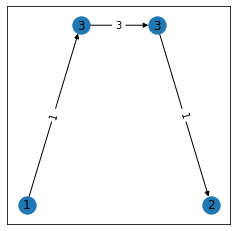

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33, 37, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 167, 168, 170, 171, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 204, 205, 206, 207, 209, 211, 212, 213, 215, 216, 217, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 1
v 0 1
v 1 3

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


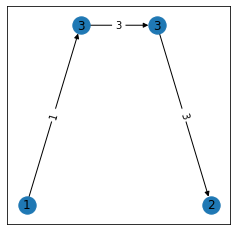

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 240, 241, 242, 243, 244

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


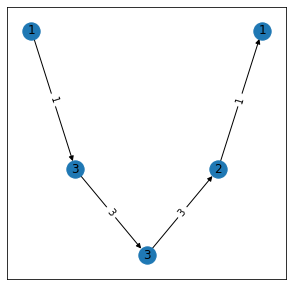

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 87, 88, 89, 90, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 138, 139, 142, 144, 145, 146, 147, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 170, 171, 172, 173, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 236, 240, 241, 242, 243, 245, 246, 247]

-----------------

t # 3
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 0 4 4
e 1 2 3
e 2 3 3

Support: 184


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


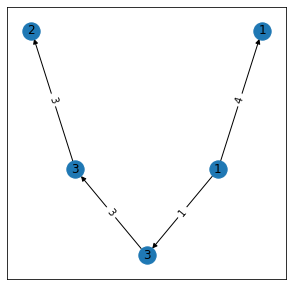

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 28, 29, 30, 31, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 55, 56, 57, 58, 61, 62, 64, 65, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 84, 87, 89, 90, 91, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 139, 141, 142, 143, 147, 148, 150, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 175, 177, 178, 179, 181, 183, 184, 185, 187, 188, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 205, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 243, 244, 245, 246, 247]

-----------------

t # 4
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 3
e 2 3 4

Support: 234


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


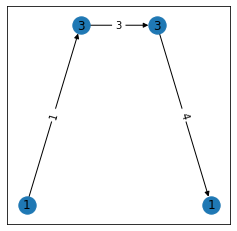

where: [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


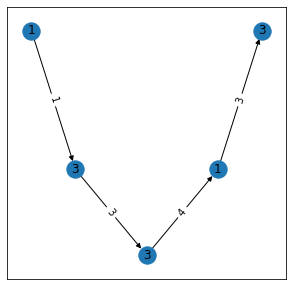

where: [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 52, 53, 54, 55, 56, 58, 59, 62, 64, 65, 66, 67, 68, 70, 71, 73, 75, 76, 77, 78, 79, 80, 81, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 146, 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 170, 171, 172, 173, 175, 177, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 199, 200, 201, 204, 205, 206, 207, 208, 209, 211, 213, 215, 216, 217, 218, 219, 220, 221, 224, 225, 226, 227, 228, 229, 230, 232, 234, 237, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 6
v 0 1
v 1 3
v 2 3
v 3 1
v 4 2
e 0 1 1
e 1 2 3
e 2 3 4
e 3 4 5

Support: 184


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


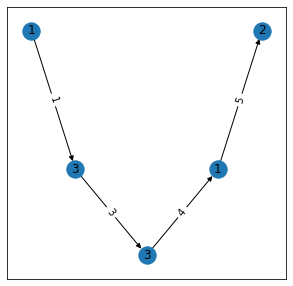

where: [0, 1, 2, 4, 5, 6, 8, 9, 12, 14, 16, 17, 19, 21, 22, 23, 26, 27, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 71, 72, 73, 76, 77, 78, 79, 80, 84, 85, 87, 89, 90, 91, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 175, 176, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 220, 221, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 238, 240, 243, 245, 246, 247]

-----------------

t # 7
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 1 2 3
e 2 3 4
e 3 4 0

Support: 188


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


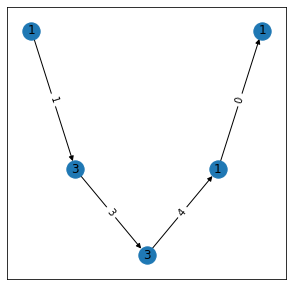

where: [0, 1, 2, 4, 5, 6, 8, 10, 12, 14, 15, 17, 18, 19, 22, 23, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 50, 52, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 90, 91, 92, 93, 94, 95, 97, 99, 100, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 145, 146, 147, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 174, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 238, 240, 243, 244, 245, 247]

-----------------

t # 8
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 1 2 3
e 2 3 4
e 3 4 5

Support: 193


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


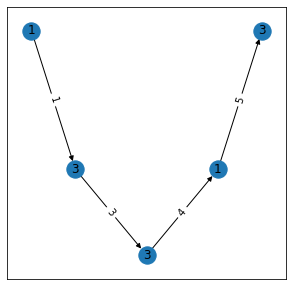

where: [0, 1, 2, 4, 5, 6, 8, 10, 12, 14, 15, 16, 17, 19, 21, 22, 23, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 54, 55, 58, 59, 62, 64, 65, 66, 67, 68, 69, 71, 73, 74, 76, 77, 78, 79, 80, 83, 84, 85, 87, 89, 90, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 174, 175, 176, 177, 178, 180, 181, 183, 184, 185, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 240, 241, 243, 245, 246, 247]

-----------------

t # 9
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 1 2 3
e 2 3 4
e 3 4 0

Support: 182


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


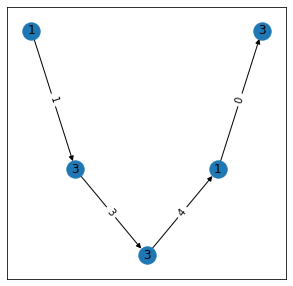

where: [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 17, 19, 21, 23, 27, 29, 30, 31, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 49, 50, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 81, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 168, 171, 172, 173, 175, 176, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 195, 197, 198, 199, 200, 201, 202, 204, 205, 207, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 224, 225, 226, 227, 228, 229, 230, 233, 234, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 10
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 1 2 3
e 2 3 5

Support: 233


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


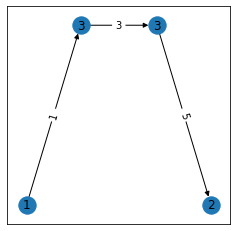

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


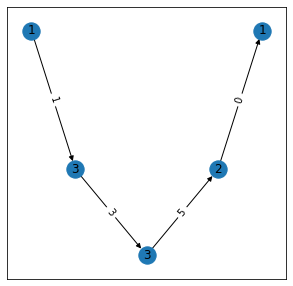

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 28, 29, 30, 31, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 58, 59, 61, 62, 63, 64, 67, 68, 70, 71, 73, 75, 76, 77, 78, 81, 82, 83, 84, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 134, 135, 138, 140, 141, 142, 144, 145, 147, 148, 150, 153, 154, 156, 157, 158, 159, 160, 162, 163, 164, 166, 167, 168, 169, 171, 172, 173, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 224, 225, 226, 227, 228, 229, 230, 231, 234, 236, 237, 238, 240, 243, 245, 246, 247]

-----------------

t # 12
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 1 2 3
e 2 3 5
e 3 4 4

Support: 190


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


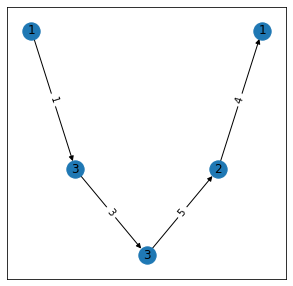

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 29, 30, 31, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 172, 173, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 197, 198, 199, 200, 201, 202, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 224, 225, 226, 227, 228, 229, 230, 233, 234, 237, 238, 240, 241, 243, 245, 246, 247]

-----------------

t # 13
v 0 1
v 1 3
v 2 3
v 3 2
v 4 2
e 0 1 1
e 1 2 3
e 1 4 4
e 2 3 5

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


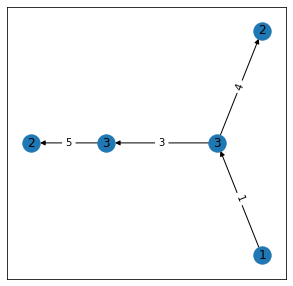

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 19, 20, 22, 23, 27, 28, 29, 30, 31, 33, 35, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 81, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 172, 173, 177, 178, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 195, 198, 199, 200, 201, 203, 204, 205, 206, 207, 210, 211, 212, 215, 216, 217, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 237, 238, 240, 243, 244, 245, 247]

-----------------

t # 14
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 1 2 3
e 1 4 4
e 2 3 5

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


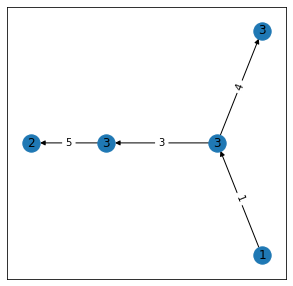

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 16, 17, 19, 20, 22, 23, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 58, 59, 61, 62, 63, 64, 68, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 127, 128, 129, 130, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 174, 175, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 193, 194, 195, 196, 197, 199, 200, 201, 204, 205, 206, 208, 210, 211, 212, 213, 214, 215, 217, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 237, 243, 245, 246, 247]

-----------------

t # 15
v 0 1
v 1 3
v 2 3
v 3 2
v 4 2
e 0 1 1
e 0 4 5
e 1 2 3
e 2 3 5

Support: 191


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


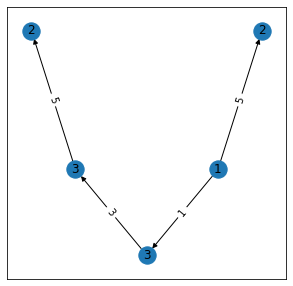

where: [0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 27, 28, 29, 30, 31, 33, 35, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 81, 82, 83, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 112, 113, 115, 116, 117, 118, 119, 121, 122, 123, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 226, 227, 228, 229, 230, 231, 233, 234, 237, 238, 239, 240, 243, 244, 245, 246, 247]

-----------------

t # 16
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 0 4 2
e 1 2 3
e 2 3 5

Support: 187


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


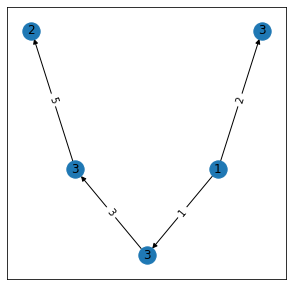

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 17, 20, 22, 23, 25, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 54, 55, 56, 58, 59, 61, 62, 63, 64, 67, 68, 71, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 117, 118, 119, 120, 122, 123, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 193, 194, 195, 196, 197, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 223, 224, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 241, 243, 245, 246, 247]

-----------------

t # 17
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 1 2 3
e 2 3 5
e 3 4 2

Support: 189


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


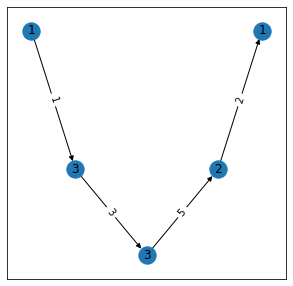

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 17, 19, 20, 22, 23, 24, 27, 29, 30, 31, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 134, 135, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 168, 170, 172, 173, 177, 178, 179, 181, 183, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 203, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 220, 222, 224, 225, 226, 227, 228, 229, 230, 231, 234, 236, 238, 239, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 18
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 1 2 3
e 2 3 5
e 3 4 3

Support: 190


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


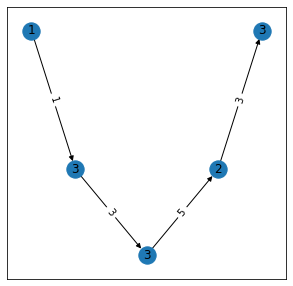

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 17, 19, 20, 22, 23, 24, 27, 28, 29, 30, 31, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 58, 60, 61, 62, 63, 64, 67, 68, 70, 71, 72, 73, 76, 77, 78, 80, 81, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 116, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 160, 162, 163, 164, 165, 166, 168, 169, 170, 173, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 207, 210, 211, 212, 213, 215, 217, 218, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 236, 238, 239, 240, 243, 244, 245, 246, 247]

-----------------

t # 19
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 0 4 4
e 1 2 3
e 2 3 5

Support: 183


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


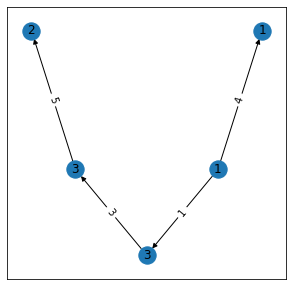

where: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 29, 30, 31, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 71, 72, 73, 75, 76, 77, 79, 82, 83, 84, 85, 87, 89, 90, 91, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 140, 141, 142, 143, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 210, 211, 212, 213, 215, 216, 217, 218, 219, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 236, 243, 244, 245, 246, 247]

-----------------

t # 20
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 1 2 3
e 1 4 5
e 2 3 5

Support: 186


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


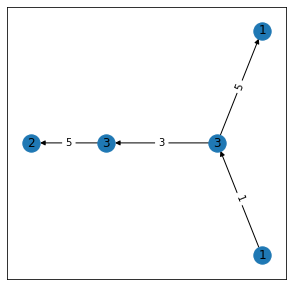

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 27, 29, 30, 31, 33, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 55, 56, 58, 59, 60, 61, 62, 63, 64, 68, 69, 71, 73, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 105, 106, 107, 108, 109, 112, 113, 114, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 176, 177, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 205, 206, 207, 210, 211, 212, 213, 214, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 236, 243, 244, 245, 246, 247]

-----------------

t # 21
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 3
e 2 3 3

Support: 225


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


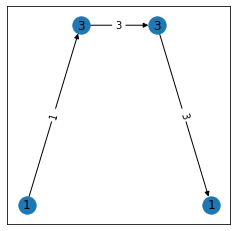

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 174, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


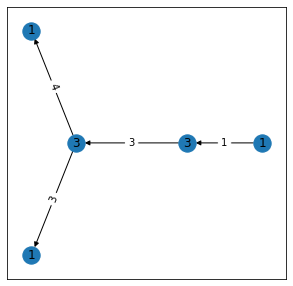

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 14, 15, 16, 17, 19, 22, 23, 26, 27, 28, 29, 30, 31, 36, 37, 38, 39, 41, 43, 44, 45, 46, 47, 49, 53, 54, 55, 56, 58, 59, 62, 63, 65, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 174, 178, 180, 181, 183, 185, 187, 188, 189, 190, 191, 192, 193, 195, 197, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 238, 240, 243, 245, 246, 247]

-----------------

t # 23
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 1 2 3
e 1 3 4

Support: 216


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


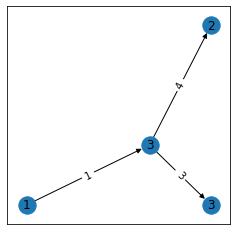

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 237, 238, 239, 240, 241, 243, 244, 245, 247]

------

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


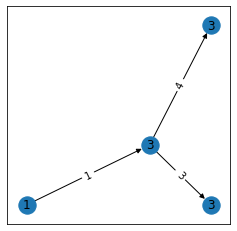

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 232, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


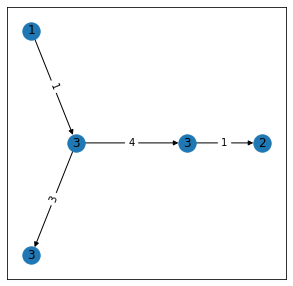

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 16, 17, 19, 22, 23, 24, 28, 29, 30, 31, 33, 35, 37, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 66, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 153, 154, 155, 156, 158, 159, 160, 161, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 204, 205, 206, 207, 208, 211, 213, 214, 215, 216, 217, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 236, 240, 243, 245, 246, 247]

-----------------

t # 26
v 0 1
v 1 3
v 2 3
v 3 3
v 4 1
e 0 1 1
e 1 2 3
e 1 3 4
e 3 4 3

Support: 183


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


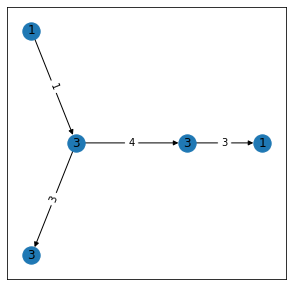

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 19, 22, 23, 25, 26, 28, 30, 31, 32, 33, 37, 39, 40, 41, 43, 44, 45, 46, 47, 49, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 70, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 134, 135, 138, 141, 142, 143, 144, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 174, 177, 178, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 199, 200, 201, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 219, 224, 225, 226, 227, 228, 229, 230, 234, 235, 236, 237, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 27
v 0 1
v 1 3
v 2 3
v 3 3
v 4 2
e 0 1 1
e 1 2 3
e 1 3 4
e 3 4 3

Support: 194


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


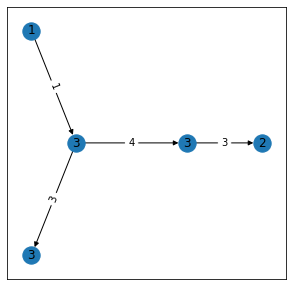

where: [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 22, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 133, 134, 135, 136, 138, 139, 141, 142, 143, 145, 146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 175, 177, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 236, 237, 238, 243, 244, 245, 246, 247]

-----------------

t # 28
v 0 1
v 1 3
v 2 3
v 3 3
v 4 1
e 0 1 1
e 0 4 2
e 1 2 3
e 1 3 4

Support: 182


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


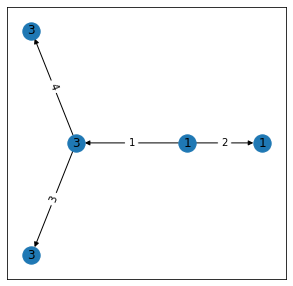

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 23, 24, 26, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 84, 85, 87, 89, 90, 91, 93, 94, 95, 97, 99, 100, 103, 104, 106, 107, 109, 110, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 132, 135, 137, 138, 141, 142, 143, 144, 145, 146, 147, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 167, 168, 169, 170, 171, 173, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 200, 201, 202, 204, 205, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 223, 224, 225, 226, 227, 229, 230, 233, 234, 235, 238, 243, 244, 245, 247]

-----------------

t # 29
v 0 1
v 1 3
v 2 3
v 3 3
v 4 3
e 0 1 1
e 0 4 2
e 1 2 3
e 1 3 4

Support: 185


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


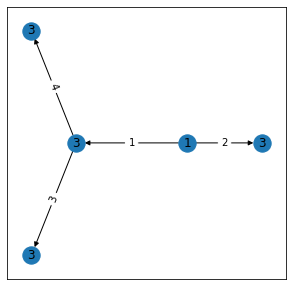

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 54, 55, 58, 59, 61, 62, 63, 64, 68, 70, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 84, 85, 87, 88, 90, 91, 93, 94, 95, 97, 99, 100, 101, 102, 103, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 143, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 170, 171, 173, 174, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 240, 243, 245, 246, 247]

-----------------

t # 30
v 0 1
v 1 3
v 2 3
v 3 3
v 4 2
e 0 1 1
e 1 2 3
e 1 3 4
e 1 4 5

Support: 194


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


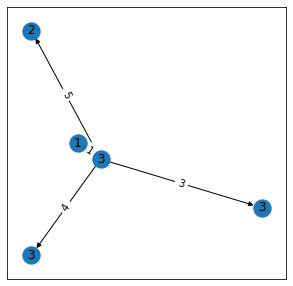

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 16, 17, 19, 20, 22, 23, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 144, 146, 147, 148, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 31
v 0 1
v 1 3
v 2 3
v 3 3
v 4 1
e 0 1 1
e 1 2 3
e 1 3 4
e 1 4 5

Support: 187


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


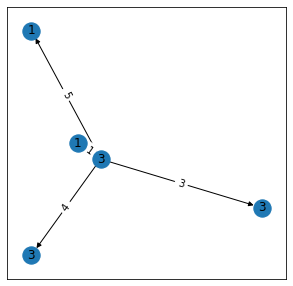

where: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 30, 31, 33, 35, 36, 37, 39, 40, 41, 43, 44, 45, 46, 47, 49, 53, 55, 56, 58, 59, 61, 62, 63, 64, 65, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 106, 107, 108, 109, 111, 112, 114, 117, 118, 119, 121, 123, 124, 125, 127, 128, 129, 130, 133, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 147, 148, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 174, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 223, 224, 225, 226, 227, 228, 229, 230, 234, 236, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 32
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 0 3 4
e 1 2 3

Support: 212


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


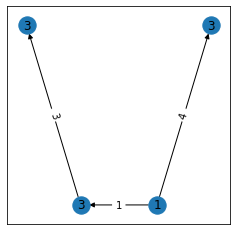

where: [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 240, 243, 244, 245, 247]

-----------------

t # 33

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


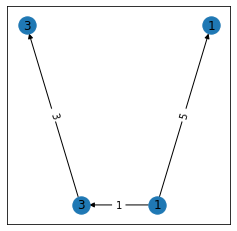

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 163, 164, 166, 167, 168, 169, 171, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 34
v 0 1
v 1 3
v 2 3
v 3

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


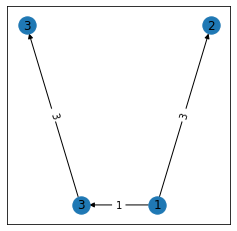

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 243, 244, 245, 247

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


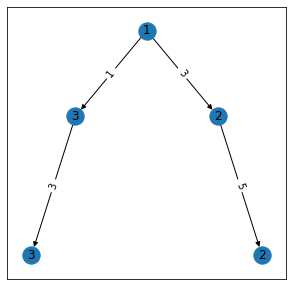

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 17, 19, 20, 24, 28, 29, 30, 31, 33, 35, 36, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 87, 89, 90, 92, 94, 95, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 123, 124, 127, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 145, 146, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 177, 178, 180, 181, 183, 184, 185, 187, 188, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 240, 241, 243, 245, 247]

-----------------

t # 36
v 0 1
v 1 3
v 2 3
v 3 2
v 4 2
e 0 1 1
e 0 3 3
e 0 4 5
e 1 2 3

Support: 183


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


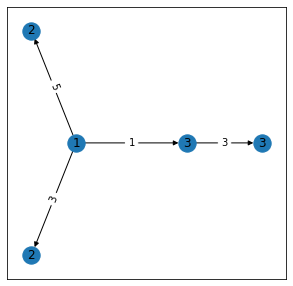

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 17, 19, 20, 23, 24, 25, 27, 28, 29, 30, 31, 33, 35, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 67, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 87, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 111, 112, 113, 116, 117, 118, 119, 121, 122, 123, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 145, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 237, 238, 240, 243, 244, 245, 247]

-----------------

t # 37
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 0 3 3
e 1 2 3
e 3 4 3

Support: 183


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


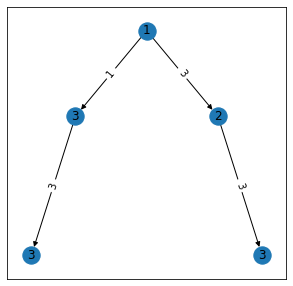

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 23, 24, 25, 28, 29, 31, 33, 35, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 89, 90, 92, 93, 94, 96, 97, 99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 145, 146, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 175, 177, 178, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 207, 209, 210, 211, 212, 213, 215, 216, 217, 219, 223, 224, 225, 226, 227, 229, 230, 231, 233, 234, 235, 236, 237, 241, 243, 244, 245, 247]

-----------------

t # 38
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 0 3 5
e 1 2 3

Support: 218


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


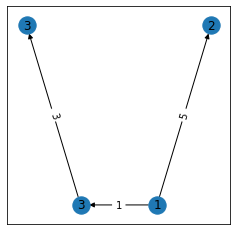

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 237, 238, 239, 240, 243, 244, 245, 246, 247]

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


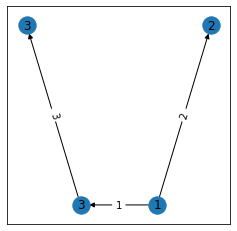

where: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 84, 87, 89, 90, 91, 92, 93, 94, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 134, 135, 136, 138, 140, 141, 142, 143, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 176, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 211, 212, 213, 215, 216, 217, 218, 219, 220, 224, 225, 226, 227, 228, 229, 230, 233, 234, 238, 240, 243, 244, 245, 247]

-----------------

t # 40
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 3
e 2 3 0

Support: 221


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


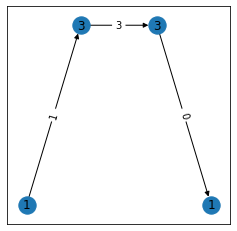

where: [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 238, 240, 241, 242, 243, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


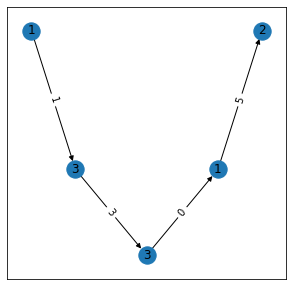

where: [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 14, 16, 17, 19, 20, 21, 22, 27, 28, 29, 30, 31, 33, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 58, 59, 61, 62, 64, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 125, 126, 127, 128, 129, 130, 134, 135, 138, 139, 140, 141, 142, 143, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 160, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 223, 225, 226, 227, 228, 229, 230, 232, 234, 235, 236, 241, 243, 245, 246, 247]

-----------------

t # 42
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 1 2 3
e 2 3 0
e 3 4 3

Support: 180


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


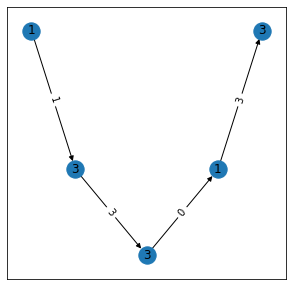

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 23, 27, 28, 29, 31, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 69, 70, 71, 73, 76, 77, 78, 79, 80, 82, 83, 84, 85, 87, 89, 90, 93, 94, 95, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 123, 124, 125, 126, 128, 129, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 203, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 219, 221, 223, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 238, 241, 243, 245, 246, 247]

-----------------

t # 43
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 1 2 3
e 1 4 4
e 2 3 0

Support: 187


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


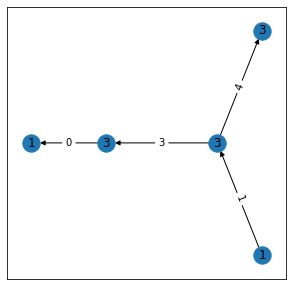

where: [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 59, 61, 62, 64, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 102, 103, 106, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 123, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 144, 145, 146, 147, 148, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 173, 174, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 219, 223, 224, 225, 226, 227, 228, 229, 230, 234, 236, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 44
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 1 2 3
e 2 3 0
e 3 4 0

Support: 187


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


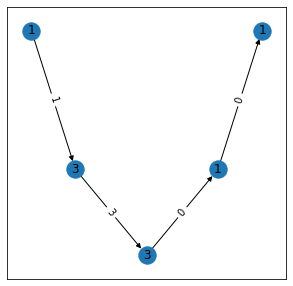

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 26, 27, 28, 29, 30, 31, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 82, 83, 84, 87, 89, 90, 91, 93, 94, 95, 97, 99, 100, 102, 103, 104, 105, 106, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 174, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 234, 235, 238, 240, 241, 242, 243, 245, 246, 247]

-----------------

t # 45
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 1 2 3
e 2 3 2

Support: 194


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


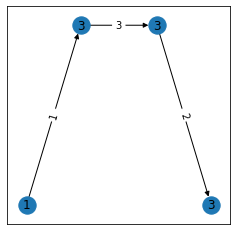

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 66, 67, 69, 71, 72, 73, 76, 77, 78, 79, 80, 84, 85, 86, 87, 90, 91, 92, 93, 94, 95, 96, 99, 100, 101, 102, 104, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 122, 123, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 224, 226, 227, 228, 229, 230, 231, 233, 234, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 46
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 1 2 3
e 2 3 2

Support: 205


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


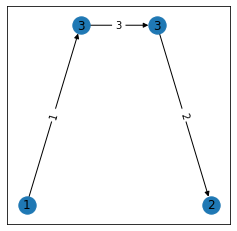

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 26, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 71, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 89, 90, 91, 93, 94, 95, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 202, 204, 206, 207, 209, 211, 212, 213, 214, 215, 216, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 238, 239, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 47
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


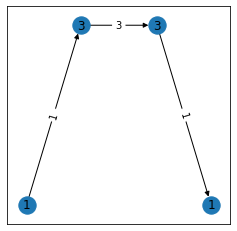

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 132, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 238, 239,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


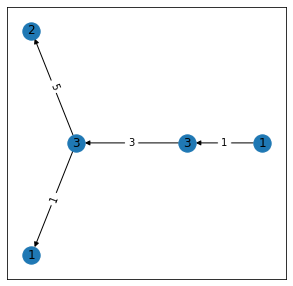

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 16, 17, 19, 20, 22, 23, 24, 25, 28, 29, 30, 31, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 71, 72, 73, 75, 76, 77, 78, 81, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 134, 135, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 170, 172, 173, 175, 177, 179, 180, 181, 183, 184, 185, 186, 188, 189, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 204, 205, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 223, 225, 226, 227, 228, 229, 230, 231, 233, 234, 236, 238, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 49
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 0 4 2
e 1 2 3
e 2 3 1

Support: 184


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


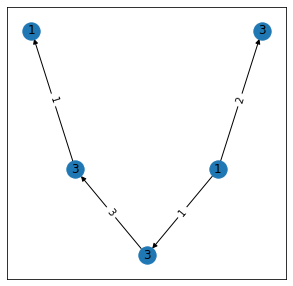

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 67, 68, 70, 71, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 93, 94, 95, 97, 99, 100, 102, 103, 104, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 127, 128, 129, 130, 134, 135, 138, 139, 140, 141, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 205, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 223, 224, 225, 226, 227, 228, 229, 230, 234, 236, 241, 243, 245, 246, 247]

-----------------

t # 50
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 0 4 4
e 1 2 3
e 2 3 1

Support: 182


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


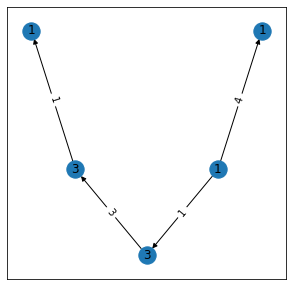

where: [0, 2, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 54, 55, 57, 58, 59, 60, 61, 62, 64, 65, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 83, 84, 87, 89, 90, 93, 94, 95, 97, 99, 100, 102, 103, 104, 105, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 126, 128, 129, 130, 132, 134, 135, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 194, 195, 196, 197, 198, 199, 200, 201, 203, 205, 207, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 225, 226, 227, 228, 229, 230, 234, 235, 236, 239, 243, 245, 246, 247]

-----------------

t # 51
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 0 3 2
e 1 2 3

Support: 228


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


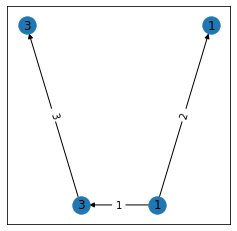

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


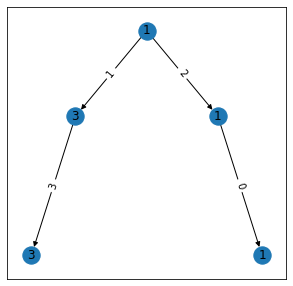

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 23, 24, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 131, 132, 135, 136, 137, 138, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 170, 171, 173, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 191, 193, 194, 195, 196, 197, 200, 201, 203, 204, 205, 207, 211, 212, 213, 214, 215, 216, 217, 219, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 240, 243, 244, 245, 246, 247]

-----------------

t # 53
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 0 3 3
e 1 2 3

Support: 217


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


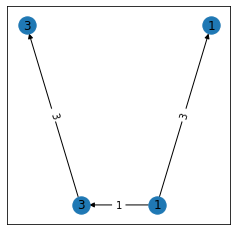

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 84, 85, 87, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 238, 240, 241, 243, 245, 246, 247]

--

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


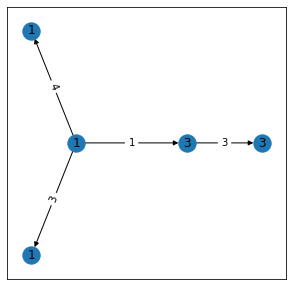

where: [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 54, 55, 57, 58, 59, 60, 61, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 84, 85, 87, 89, 90, 91, 93, 94, 95, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 195, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 238, 240, 243, 245, 247]

-----------------

t # 55
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 0 3 2
e 1 2 3

Support: 232


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


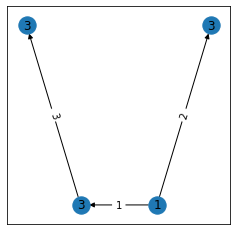

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


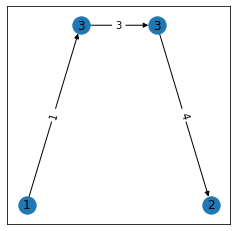

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


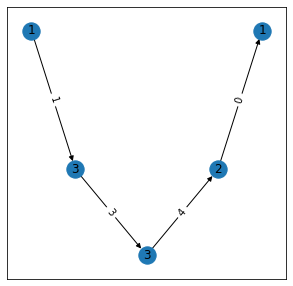

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 175, 177, 178, 181, 183, 184, 185, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 202, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 220, 222, 223, 225, 226, 227, 228, 229, 230, 232, 233, 234, 236, 240, 241, 243, 244, 245, 247]

-----------------

t # 58
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 1 2 3
e 2 3 4
e 3 4 5

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


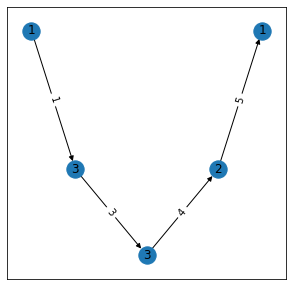

where: [0, 1, 2, 3, 4, 5, 6, 8, 12, 14, 16, 17, 19, 22, 23, 24, 27, 28, 29, 30, 31, 35, 36, 37, 39, 40, 41, 42, 43, 44, 46, 47, 49, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 67, 68, 70, 71, 73, 74, 75, 76, 78, 80, 81, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 153, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 238, 240, 241, 243, 245, 247]

-----------------

t # 59
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 1 2 3
e 1 4 5
e 2 3 4

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


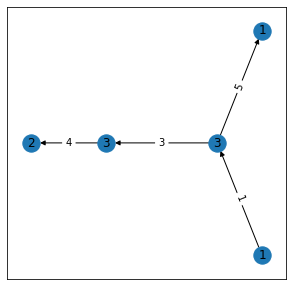

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 17, 19, 20, 22, 23, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 54, 55, 56, 57, 58, 61, 62, 63, 64, 67, 68, 69, 70, 71, 73, 75, 76, 77, 78, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 102, 103, 105, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 171, 173, 175, 177, 178, 179, 180, 181, 183, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 202, 204, 206, 207, 210, 211, 212, 213, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 236, 244, 245, 246, 247]

-----------------

t # 60
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 1 2 3
e 2 3 1

Support: 207


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


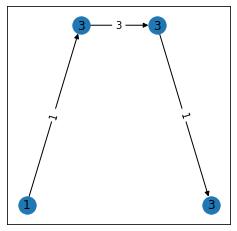

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 93, 94, 95, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 238, 240, 243, 244, 245, 247]

-----------------

t # 61
v 0 1
v 1 3
v 2 3
v

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


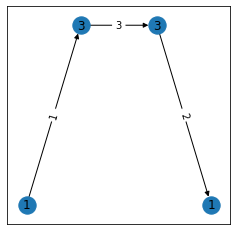

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 23

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


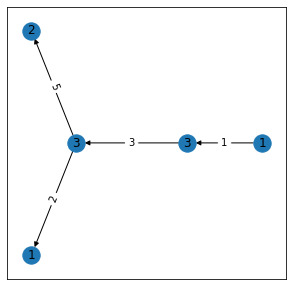

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 16, 17, 19, 20, 22, 23, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82, 83, 84, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 112, 117, 118, 119, 120, 122, 123, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 204, 206, 207, 208, 209, 210, 211, 212, 213, 215, 217, 218, 219, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 238, 239, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 63
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 0 4 4
e 1 2 3
e 2 3 2

Support: 183


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


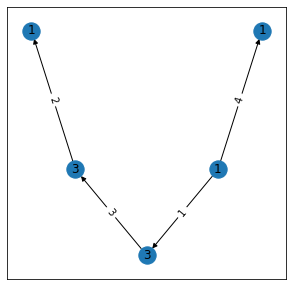

where: [0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 68, 69, 70, 71, 72, 73, 76, 79, 80, 81, 82, 83, 85, 87, 90, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 134, 135, 137, 138, 140, 141, 142, 143, 144, 145, 147, 148, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 223, 225, 226, 227, 228, 229, 230, 231, 234, 243, 245, 246, 247]

-----------------

t # 64
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 0 4 2
e 1 2 3
e 2 3 2

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


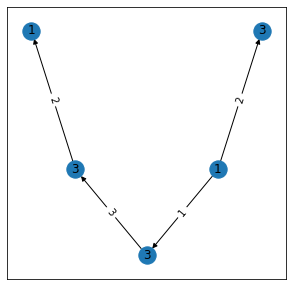

where: [0, 1, 2, 4, 5, 6, 8, 11, 12, 13, 14, 16, 17, 21, 22, 23, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 87, 90, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 125, 126, 127, 128, 129, 130, 135, 138, 140, 141, 142, 143, 144, 145, 147, 148, 150, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 183, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 219, 220, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 241, 243, 245, 246, 247]

-----------------

t # 65
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 1 2 3
e 2 3 2
e 2 4 4

Support: 193


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


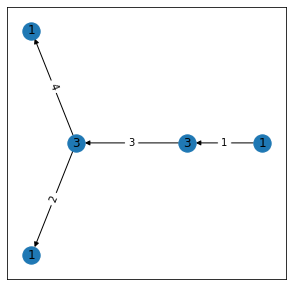

where: [0, 1, 2, 4, 5, 6, 8, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 26, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 58, 59, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 78, 79, 80, 82, 83, 84, 85, 87, 90, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 174, 175, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 238, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 66
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 0 3 4
e 1 2 3

Support: 230


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


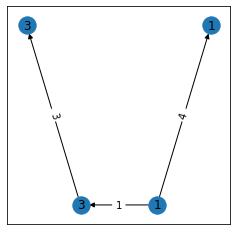

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


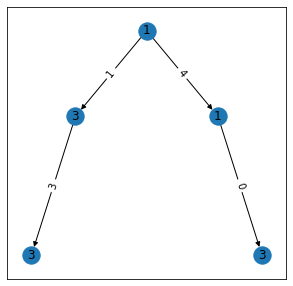

where: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 85, 89, 90, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 156, 157, 158, 159, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 175, 177, 178, 180, 181, 183, 184, 185, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 205, 207, 209, 210, 211, 212, 213, 216, 217, 218, 219, 220, 224, 225, 226, 227, 228, 229, 230, 231, 234, 238, 243, 244, 245, 247]

-----------------

t # 68
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 0 3 4
e 1 2 3
e 3 4 3

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


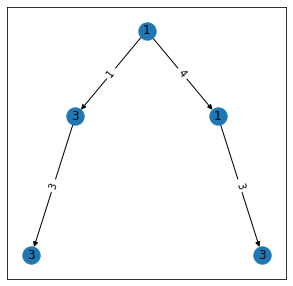

where: [0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 54, 55, 56, 58, 59, 61, 62, 64, 65, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 85, 87, 89, 90, 93, 94, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 119, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 142, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 164, 166, 167, 168, 170, 171, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 207, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 234, 238, 240, 243, 244, 245, 247]

-----------------

t # 69
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 0 3 4
e 0 4 4
e 1 2 3

Support: 180


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


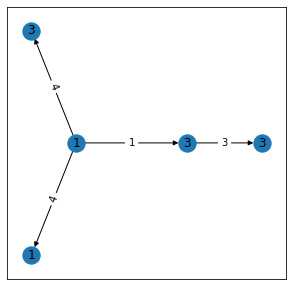

where: [0, 2, 4, 6, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 28, 29, 30, 31, 34, 35, 38, 39, 40, 41, 42, 43, 45, 47, 49, 51, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 112, 113, 114, 115, 116, 118, 119, 121, 122, 124, 126, 127, 128, 129, 130, 131, 134, 135, 136, 139, 140, 141, 143, 146, 147, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 243, 244, 245, 247]

-----------------

t # 70
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 0 3 4
e 1 2 3
e 3 4 2

Support: 193


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


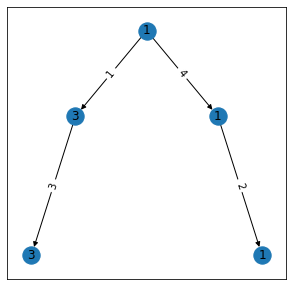

where: [0, 1, 2, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 25, 26, 28, 29, 30, 31, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 87, 89, 90, 91, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 152, 153, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 175, 177, 178, 179, 180, 181, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 229, 230, 232, 233, 234, 238, 239, 240, 243, 244, 245, 246, 247]

-----------------

t # 71
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 1 2 3
e 2 3 0

Support: 220


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


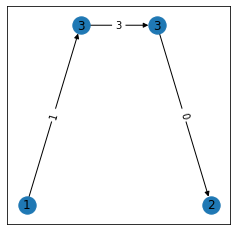

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 238, 239, 240, 241, 243, 244, 245,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


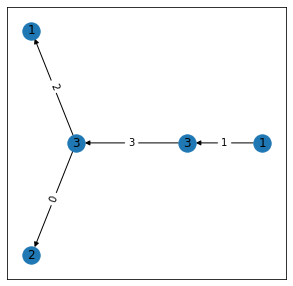

where: [0, 1, 2, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 78, 79, 80, 82, 83, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 112, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 174, 177, 178, 179, 180, 181, 183, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 200, 201, 202, 203, 204, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 219, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 238, 239, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 73
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 1 2 3
e 2 3 0
e 2 4 4

Support: 188


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


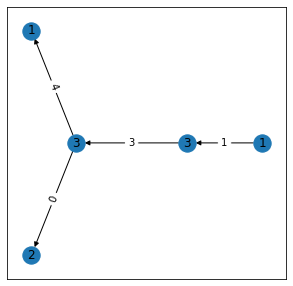

where: [0, 1, 2, 4, 5, 6, 8, 10, 12, 14, 15, 17, 19, 20, 21, 22, 23, 26, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 76, 77, 78, 79, 80, 82, 83, 87, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 238, 240, 241, 243, 245, 246, 247]

-----------------

t # 74
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 1 2 3
e 1 4 4
e 2 3 0

Support: 180


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


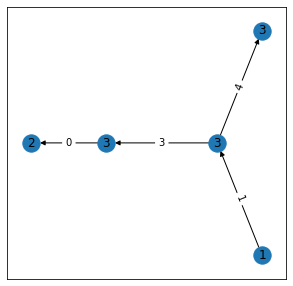

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 52, 55, 57, 58, 60, 62, 64, 66, 67, 68, 69, 71, 73, 76, 77, 78, 79, 80, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 142, 143, 146, 147, 148, 150, 152, 153, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 200, 201, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 227, 228, 229, 230, 233, 234, 235, 240, 243, 245, 247]

-----------------

t # 75
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 1 2 3
e 2 3 0
e 3 4 2

Support: 184


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


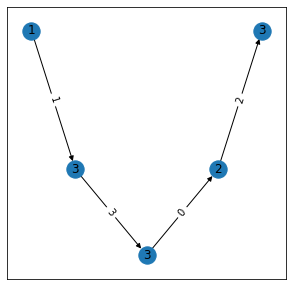

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 19, 21, 23, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 76, 77, 78, 79, 80, 81, 82, 88, 89, 90, 91, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 117, 118, 119, 120, 121, 123, 125, 126, 127, 128, 129, 130, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 181, 183, 184, 185, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 204, 205, 207, 208, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 238, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 76
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 0 3 3
e 1 2 3

Support: 216


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


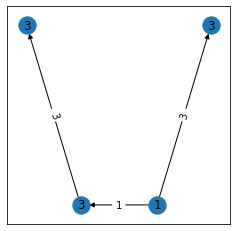

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 132, 135, 136, 138, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 240, 242, 243, 244, 245, 246, 247]

----------

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


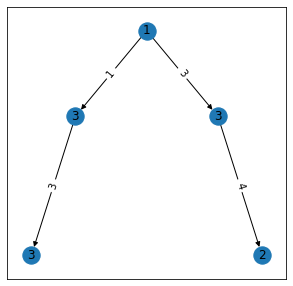

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 23, 24, 25, 28, 29, 30, 31, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 73, 76, 78, 79, 80, 81, 82, 84, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 112, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 126, 127, 128, 129, 132, 135, 136, 138, 141, 142, 145, 146, 147, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 175, 177, 178, 179, 181, 183, 184, 185, 187, 188, 190, 191, 193, 194, 195, 196, 199, 200, 201, 204, 205, 206, 207, 210, 211, 212, 213, 215, 216, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 237, 238, 240, 242, 243, 245, 247]

-----------------

t # 78
v 0 1
v 1 3
v 2 3
v 3 3
v 4 2
e 0 1 1
e 0 3 3
e 1 2 3
e 3 4 0

Support: 186


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


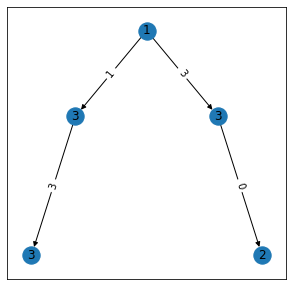

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 22, 23, 25, 27, 28, 29, 30, 31, 32, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 76, 78, 79, 80, 81, 82, 83, 87, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 112, 115, 116, 117, 118, 119, 120, 121, 123, 124, 126, 127, 128, 129, 130, 132, 135, 136, 138, 141, 143, 145, 146, 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 219, 223, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 79
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 0 3 5
e 1 2 3

Support: 218


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


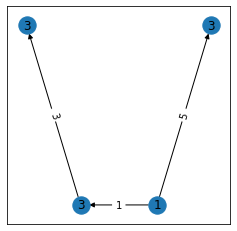

where: [0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 177, 178, 179, 181, 183, 184, 185, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


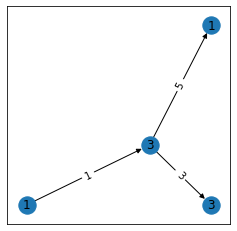

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


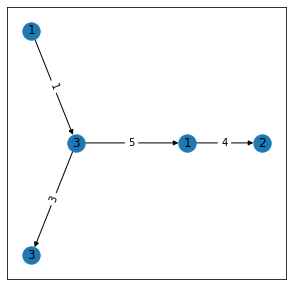

where: [0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 17, 19, 20, 22, 23, 27, 29, 30, 31, 34, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 171, 173, 174, 175, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 193, 194, 195, 196, 198, 199, 200, 201, 204, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 236, 238, 243, 244, 245, 247]

-----------------

t # 82
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 1 2 3
e 1 3 5
e 3 4 3

Support: 182


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


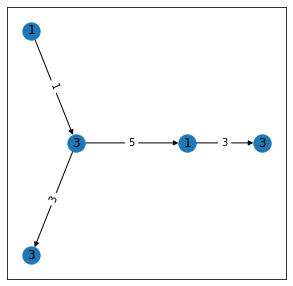

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 27, 28, 29, 30, 31, 33, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 141, 142, 143, 144, 147, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 163, 165, 166, 168, 171, 173, 174, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 216, 218, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 237, 238, 243, 244, 245, 246, 247]

-----------------

t # 83
v 0 1
v 1 3
v 2 3
v 3 1
v 4 2
e 0 1 1
e 1 2 3
e 1 3 5
e 1 4 5

Support: 183


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


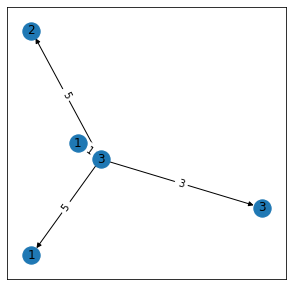

where: [0, 1, 2, 4, 5, 6, 8, 12, 13, 14, 16, 17, 19, 20, 22, 23, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 67, 69, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 130, 134, 135, 136, 140, 141, 143, 144, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 173, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 216, 218, 219, 221, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 236, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 84
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 0 4 2
e 1 2 3
e 1 3 5

Support: 185


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


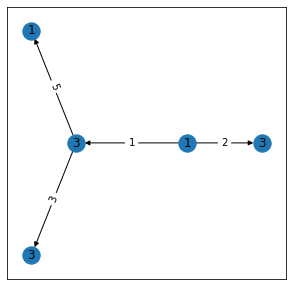

where: [0, 1, 2, 3, 4, 6, 8, 9, 11, 12, 13, 14, 16, 17, 20, 22, 23, 25, 26, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 54, 55, 58, 59, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 119, 121, 122, 124, 125, 127, 128, 129, 130, 134, 135, 136, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 170, 171, 173, 174, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 203, 204, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 218, 219, 223, 224, 225, 226, 227, 228, 229, 230, 232, 234, 236, 237, 240, 243, 244, 245, 246, 247]

-----------------

t # 85
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 0 4 2
e 1 2 3
e 1 3 5

Support: 180


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


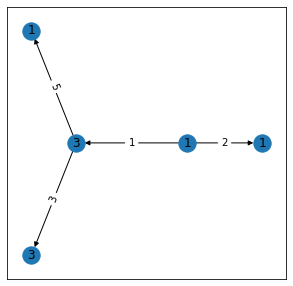

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17, 19, 20, 21, 23, 26, 28, 29, 30, 31, 34, 35, 36, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 55, 56, 58, 59, 61, 62, 64, 65, 69, 70, 71, 72, 73, 75, 76, 78, 79, 81, 84, 85, 87, 89, 90, 91, 94, 95, 96, 97, 99, 100, 102, 103, 104, 106, 108, 109, 111, 112, 113, 114, 117, 118, 119, 120, 121, 122, 124, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 175, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 237, 238, 243, 244, 245, 246, 247]

-----------------

t # 86
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 1 2 3
e 2 3 3

Support: 200


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


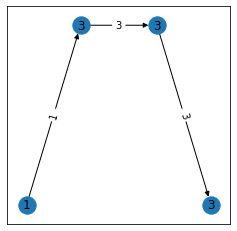

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 121, 123, 124, 125, 126, 127, 128, 129, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 166, 167, 168, 170, 171, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 215, 216, 217, 218, 220, 222, 223, 224, 226, 227, 228, 229, 230, 232, 233, 234, 235, 240, 241, 243, 244, 245, 247]

-----------------

t # 87
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 3
e 1 3 4

Support

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


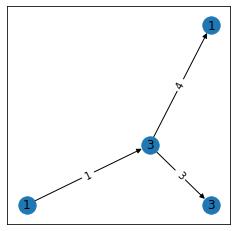

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 236, 237, 238, 239, 242, 243, 244, 245, 246,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


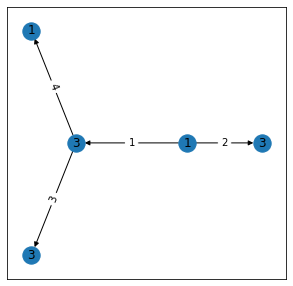

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 22, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 49, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117, 118, 119, 120, 122, 124, 125, 126, 127, 128, 129, 130, 135, 136, 138, 140, 141, 142, 143, 144, 145, 147, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 174, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 204, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 236, 237, 242, 243, 244, 245, 246, 247]

-----------------

t # 89
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 1 2 3
e 1 3 5

Support: 221


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


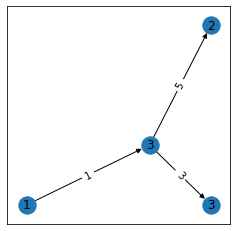

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 238, 240, 242, 243, 244, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


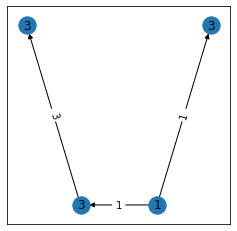

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 132, 135, 136, 137, 138, 139, 140, 141, 142, 144, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 176, 177, 178, 179, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 200, 201, 202, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 91
v 0 1
v 1 3
v 2 3
v 3 2
e 0 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


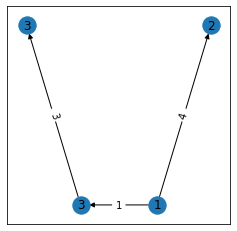

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 84, 87, 88, 89, 90, 91, 93, 94, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 167, 168, 169, 170, 171, 175, 177, 178, 180, 181, 183, 184, 185, 187, 188, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 211, 212, 213, 215, 216, 217, 219, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 243, 245, 246, 247]

-----------------

t # 92
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 1 2 3
e 2 3 4

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


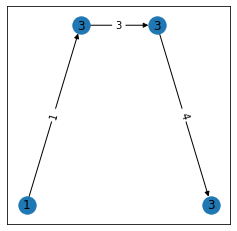

where: [1, 2, 3, 4, 5, 6, 8, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 37, 39, 41, 43, 44, 46, 47, 48, 49, 50, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 84, 86, 87, 88, 89, 90, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 116, 117, 119, 121, 122, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 143, 145, 146, 147, 148, 150, 151, 153, 154, 156, 158, 159, 160, 162, 163, 164, 166, 170, 171, 177, 178, 179, 180, 181, 183, 184, 185, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 238, 240, 243, 244, 245, 247]

-----------------

t # 93
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 3
e 2 3 5

Support: 200


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


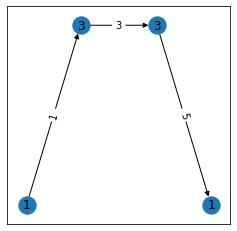

where: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 26, 27, 28, 30, 31, 33, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 47, 48, 49, 54, 55, 58, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 135, 136, 138, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 94
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 1
e 1 2 4
e 2 3 1



/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


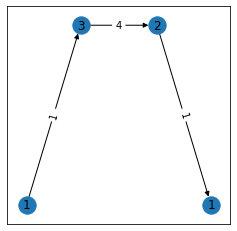

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 237, 238, 240, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


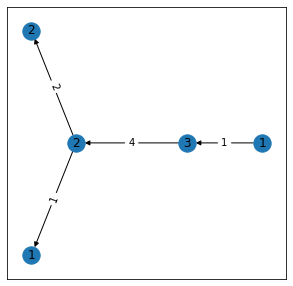

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17, 20, 22, 23, 25, 27, 29, 30, 31, 32, 33, 37, 38, 39, 40, 41, 42, 43, 46, 47, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 111, 112, 113, 115, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 166, 168, 169, 171, 173, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 198, 199, 200, 201, 203, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 234, 237, 238, 240, 242, 245, 247]

-----------------

t # 96
v 0 1
v 1 3
v 2 2
v 3 1
v 4 2
e 0 1 1
e 0 4 5
e 1 2 4
e 2 3 1

Support: 187


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


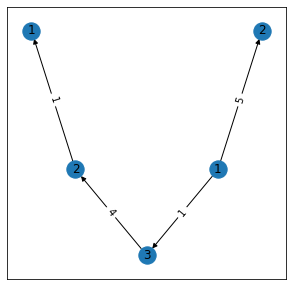

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 17, 20, 22, 23, 24, 25, 27, 29, 30, 31, 35, 38, 39, 40, 41, 42, 43, 46, 47, 49, 53, 54, 55, 57, 58, 60, 61, 62, 63, 66, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 166, 168, 171, 172, 173, 175, 176, 177, 178, 181, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 203, 204, 205, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 237, 238, 240, 242, 245, 247]

-----------------

t # 97
v 0 1
v 1 3
v 2 2
v 3 1
v 4 3
e 0 1 1
e 1 2 4
e 2 3 1
e 3 4 3

Support: 188


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


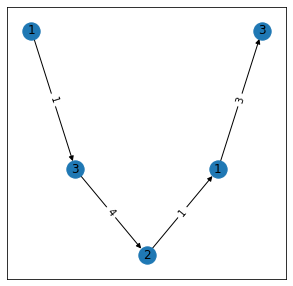

where: [0, 1, 2, 4, 5, 6, 8, 9, 12, 13, 14, 16, 17, 20, 21, 22, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 147, 148, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 238, 240, 243, 245, 247]

-----------------

t # 98
v 0 1
v 1 3
v 2 2
v 3 1
v 4 2
e 0 1 1
e 1 2 4
e 2 3 1
e 3 4 2

Support: 180


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


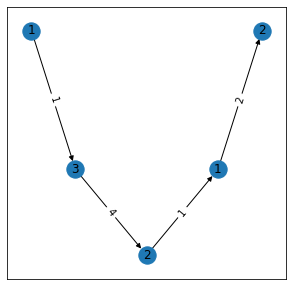

where: [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 25, 29, 30, 31, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 75, 76, 77, 78, 79, 80, 82, 83, 85, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 135, 136, 138, 139, 140, 141, 142, 143, 146, 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 170, 172, 173, 175, 176, 177, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 195, 196, 198, 199, 200, 201, 203, 205, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 220, 221, 224, 226, 227, 228, 229, 230, 233, 234, 235, 238, 240, 244, 245, 247]

-----------------

t # 99
v 0 1
v 1 3
v 2 2
v 3 1
v 4 3
e 0 1 1
e 1 2 4
e 2 3 1
e 2 4 3

Support: 190


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


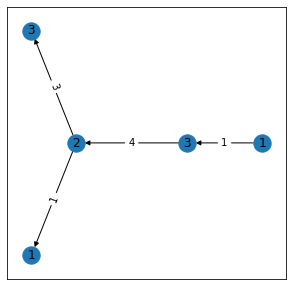

where: [1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17, 19, 22, 23, 25, 29, 30, 31, 32, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 54, 55, 56, 58, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 166, 168, 169, 170, 171, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 199, 200, 201, 203, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 238, 240, 242, 243, 244, 245, 247]

-----------------

t # 100
v 0 1
v 1 3
v 2 2
v 3 2
e 0 1 1
e 1 2 4
e 2 3 3

Support: 213


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


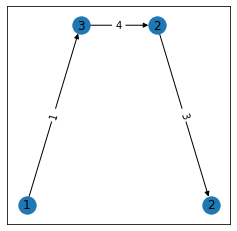

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 236, 237, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


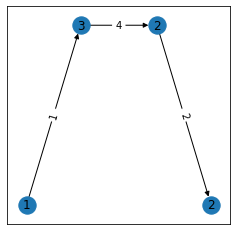

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


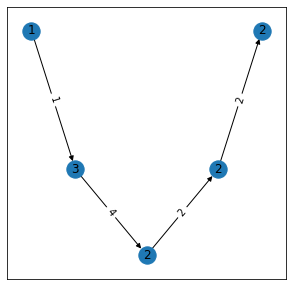

where: [0, 2, 3, 4, 6, 8, 9, 12, 13, 14, 15, 16, 17, 19, 22, 23, 25, 27, 28, 30, 31, 32, 33, 39, 41, 42, 43, 45, 46, 47, 49, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 174, 176, 177, 178, 181, 183, 184, 185, 186, 187, 188, 190, 191, 193, 194, 195, 196, 198, 200, 201, 203, 204, 205, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 237, 238, 239, 240, 243, 244, 245, 247]

-----------------

t # 103
v 0 1
v 1 3
v 2 2
v 3 2
v 4 3
e 0 1 1
e 1 2 4
e 2 3 2
e 2 4 3

Support: 203


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


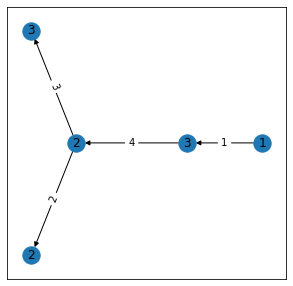

where: [0, 1, 2, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 171, 172, 173, 174, 176, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 237, 238, 239, 240, 242, 243, 245, 246, 247]

-----------------

t # 104
v 0 1
v 1 3
v 2 2
v 3 2
e 0 1 1
e 1 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


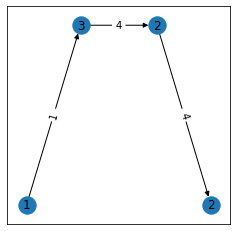

where: [0, 2, 3, 4, 5, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 52, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 78, 79, 81, 82, 84, 85, 87, 88, 89, 90, 92, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 171, 172, 173, 174, 176, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 199, 200, 201, 203, 205, 207, 208, 210, 211, 212, 213, 215, 216, 218, 219, 224, 226, 227, 228, 229, 230, 233, 234, 235, 237, 242, 243, 244, 245, 246, 247]

-----------------

t # 105
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 1
e 1 2 4
e 1 3 4

Support: 193


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


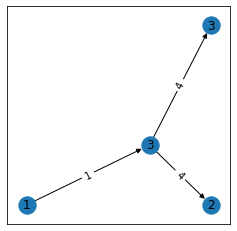

where: [0, 1, 2, 3, 4, 6, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 33, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 123, 124, 125, 126, 127, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 168, 170, 171, 172, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 223, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 240, 242, 243, 244, 245, 247]

-----------------

t # 106
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 1
e 0 3 4
e 1 2 4

Support: 201


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


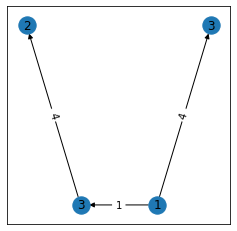

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 25, 28, 29, 30, 31, 33, 35, 36, 37, 39, 40, 41, 42, 43, 44, 46, 47, 49, 50, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 129, 130, 131, 134, 135, 136, 138, 139, 140, 141, 142, 143, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 169, 171, 173, 175, 176, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247]

-----------------

t # 107
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 1
e 0 3 5
e 1 2 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


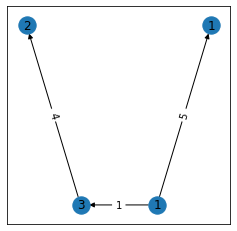

where: [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 29, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 53, 54, 55, 57, 59, 61, 62, 63, 64, 65, 67, 69, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 143, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 166, 169, 170, 172, 173, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 223, 224, 225, 227, 228, 229, 230, 231, 233, 234, 235, 237, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 108
v 0 1
v 1 3
v 2 2
v 3 2
e 0 1 1
e 0 3 3
e 1 2 4

Support: 200


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


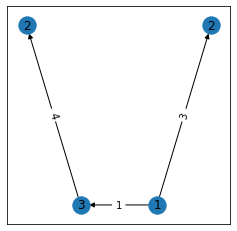

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 183, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 238, 240, 241, 242, 243, 244, 245, 247]

-----------------

t # 109
v 0 1
v 1 3
v 2 2
v 3 2
v 4 3
e 0 1 1
e 0 3 3
e 1 2 4

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


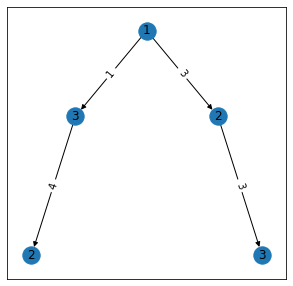

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 16, 17, 19, 20, 21, 24, 25, 27, 29, 30, 31, 32, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 134, 135, 136, 138, 140, 141, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 183, 185, 186, 188, 189, 190, 191, 194, 195, 196, 198, 200, 201, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 219, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 240, 241, 243, 244, 245, 247]

-----------------

t # 110
v 0 1
v 1 3
v 2 2
v 3 2
e 0 1 1
e 0 3 5
e 1 2 4

Support: 226


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


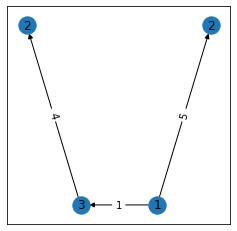

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


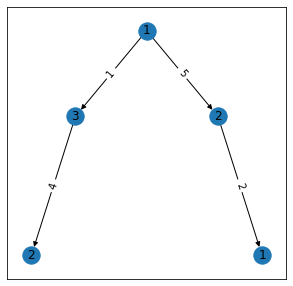

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 14, 16, 17, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 35, 37, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 68, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 143, 145, 146, 147, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 173, 175, 176, 177, 178, 181, 183, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 223, 224, 226, 227, 228, 229, 230, 231, 234, 237, 238, 240, 242, 243, 244, 245, 247]

-----------------

t # 112
v 0 1
v 1 3
v 2 2
v 3 2
v 4 3
e 0 1 1
e 0 3 5
e 1 2 4
e 3 4 0

Support: 185


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


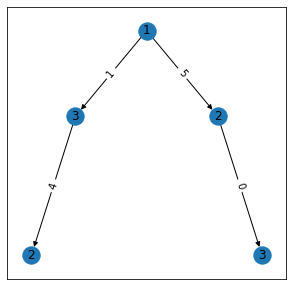

where: [0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 17, 19, 20, 22, 25, 27, 28, 29, 30, 31, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 52, 53, 55, 57, 58, 60, 61, 62, 63, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 121, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 159, 161, 162, 163, 164, 165, 166, 168, 170, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 190, 191, 193, 194, 195, 196, 200, 201, 203, 204, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 234, 235, 237, 238, 240, 242, 243, 245, 247]

-----------------

t # 113
v 0 1
v 1 3
v 2 2
v 3 2
v 4 3
e 0 1 1
e 0 3 5
e 1 2 4
e 3 4 1

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


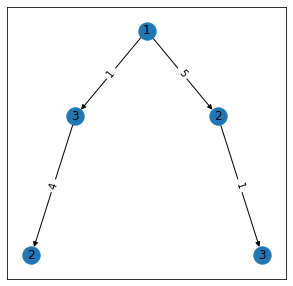

where: [0, 2, 3, 4, 5, 6, 8, 14, 16, 17, 20, 22, 23, 25, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 67, 68, 69, 70, 71, 73, 74, 76, 78, 80, 81, 83, 85, 87, 89, 90, 91, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 111, 112, 113, 114, 115, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 198, 200, 201, 202, 203, 204, 205, 206, 207, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 237, 238, 240, 243, 244, 245, 247]

-----------------

t # 114
v 0 1
v 1 3
v 2 2
v 3 2
e 0 1 1
e 0 3 2
e 1 2 4

Support: 194


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


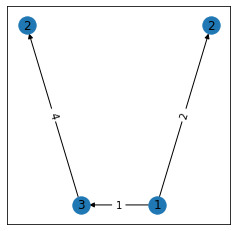

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 41, 42, 43, 44, 46, 47, 49, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 84, 85, 86, 88, 89, 90, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 134, 135, 136, 138, 140, 141, 142, 143, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 168, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 199, 200, 201, 202, 203, 204, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 238, 240, 241, 243, 244, 245, 247]

-----------------

t # 115
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 1
e 1 2 4
e 2 3 2

Support: 220


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


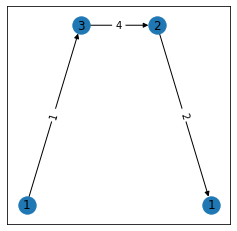

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 238, 239, 240, 241, 243, 244, 245, 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


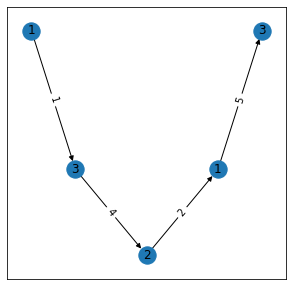

where: [0, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 25, 27, 28, 29, 30, 31, 33, 35, 38, 39, 41, 42, 43, 45, 46, 48, 49, 52, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 135, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 187, 188, 190, 191, 192, 193, 194, 195, 196, 200, 201, 204, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 219, 220, 225, 226, 227, 228, 229, 230, 231, 234, 237, 238, 239, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 117
v 0 1
v 1 3
v 2 2
v 3 1
v 4 2
e 0 1 1
e 1 2 4
e 2 3 2
e 3 4 3

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


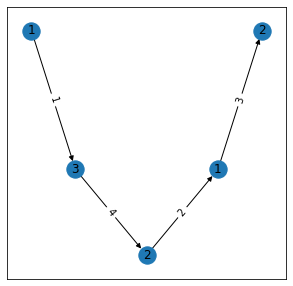

where: [0, 1, 2, 3, 4, 5, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 35, 38, 39, 41, 42, 43, 46, 47, 48, 49, 50, 52, 54, 55, 57, 58, 59, 61, 62, 63, 65, 68, 69, 71, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 135, 136, 138, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 167, 168, 170, 171, 173, 174, 177, 178, 181, 183, 184, 185, 187, 188, 190, 192, 193, 194, 195, 196, 197, 199, 200, 201, 205, 206, 207, 208, 210, 211, 212, 213, 215, 217, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 233, 235, 237, 238, 239, 240, 243, 244, 245, 246, 247]

-----------------

t # 118
v 0 1
v 1 3
v 2 2
v 3 1
v 4 3
e 0 1 1
e 1 2 4
e 2 3 2
e 2 4 4

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


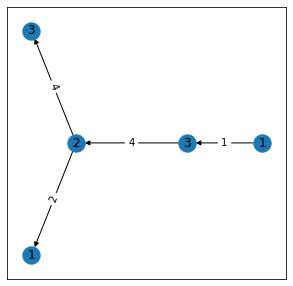

where: [0, 2, 3, 4, 5, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 52, 54, 55, 57, 58, 59, 61, 62, 63, 67, 68, 69, 70, 71, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 92, 93, 94, 95, 97, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 135, 136, 138, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 168, 170, 173, 174, 177, 178, 181, 183, 184, 185, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 200, 201, 202, 204, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 220, 222, 224, 225, 226, 227, 228, 229, 230, 233, 235, 237, 238, 239, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 119
v 0 1
v 1 3
v 2 2
v 3 2
e 0 1 1
e 1 2 4
e 2 3 1

Support: 204


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


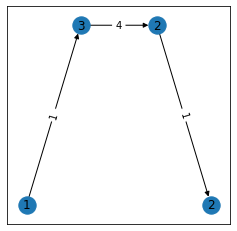

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 88, 89, 90, 91, 92, 93, 94, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 227, 228, 229, 230, 234, 235, 237, 240, 243, 244, 247]

-----------------

t # 120
v 0 1
v 1 3
v 2 2
v 3 2
e 0 1 1
e

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


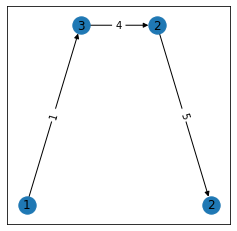

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 49, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 82, 83, 84, 85, 87, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 140, 141, 142, 143, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 203, 205, 206, 207, 210, 211, 212, 213, 216, 217, 218, 219, 220, 221, 224, 225, 226, 227, 228, 229, 230, 233, 234, 237, 238, 240, 242, 243, 245, 246, 247]

-----------------

t # 121
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 1
e 0 3 5
e 1 2 4

Support: 212


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


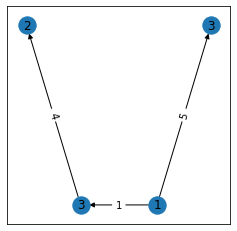

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 16, 17, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 87, 88, 89, 90, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247]

-----------------

t

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


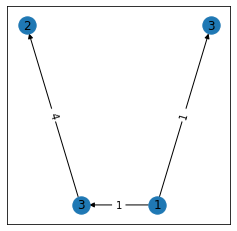

where: [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 238, 240, 241, 242, 243, 244, 245, 246, 247]

-----------------

t # 123
v 0 1
v 1

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


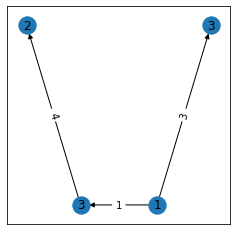

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 169, 170, 172, 173, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 237, 240, 241, 242, 243, 245, 246, 247]

-----------------

t # 124
v 0 1
v 1 3
v 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


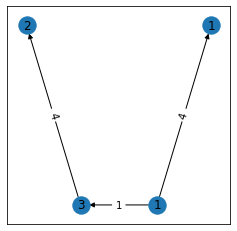

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 237, 238, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


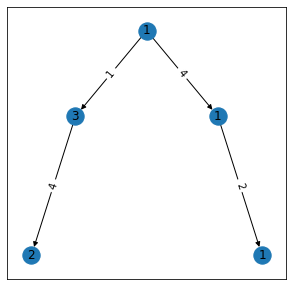

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 33, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 52, 54, 55, 56, 57, 58, 59, 61, 62, 64, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 87, 89, 90, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 134, 135, 137, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 238, 239, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 126
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 1
e 0 3 2
e 1 2 4

Suppo

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


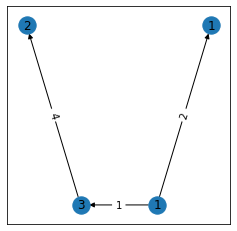

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 173, 174, 175, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 239, 240, 243, 244, 245, 246, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


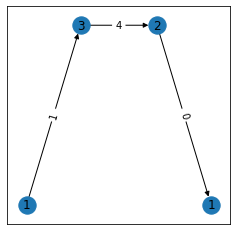

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 131, 132, 134, 135, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 181, 183, 184, 185, 187, 188, 191, 192, 194, 195, 196, 197, 198, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 128
v 0 1
v 1 3
v 2 2
v 3 1
v 4 3
e 0 1 1
e 1

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


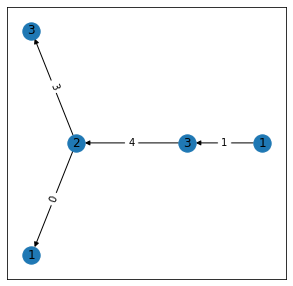

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 25, 27, 28, 29, 30, 31, 33, 34, 37, 38, 39, 41, 42, 43, 45, 46, 47, 49, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 105, 107, 108, 109, 110, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 132, 135, 138, 139, 140, 142, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 168, 169, 173, 174, 176, 177, 178, 179, 181, 183, 184, 185, 187, 188, 191, 192, 194, 195, 196, 197, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 221, 222, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 237, 238, 239, 240, 242, 243, 245, 246, 247]

-----------------

t # 129
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 1
e 1 2 4
e 2 3 4

Support: 214


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


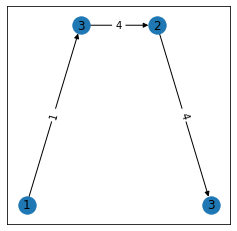

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 54, 55, 57, 58, 59, 60, 61, 62, 63, 67, 68, 69, 70, 71, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 173, 174, 176, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247]

-------------

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


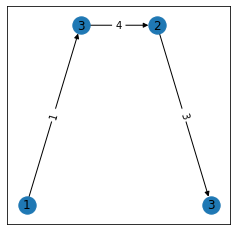

where: [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


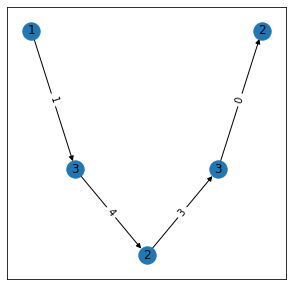

where: [0, 1, 2, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 22, 23, 28, 29, 31, 33, 37, 38, 39, 41, 42, 43, 45, 46, 47, 49, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 83, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 168, 173, 174, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 204, 205, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 234, 237, 239, 240, 242, 243, 244, 245, 247]

-----------------

t # 132
v 0 1
v 1 3
v 2 2
v 3 3
v 4 2
e 0 1 1
e 1 2 4
e 2 3 3
e 3 4 1

Support: 185


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


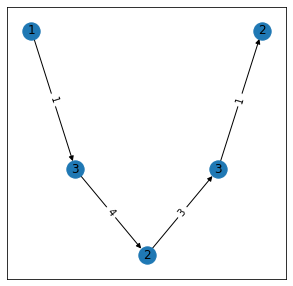

where: [0, 2, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 19, 21, 22, 23, 24, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 49, 54, 55, 57, 59, 60, 61, 62, 64, 65, 68, 69, 70, 71, 72, 73, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 142, 143, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 170, 171, 172, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 210, 211, 212, 213, 215, 216, 217, 219, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 237, 240, 242, 243, 245, 247]

-----------------

t # 133
v 0 1
v 1 3
v 2 2
v 3 3
v 4 2
e 0 1 1
e 0 4 5
e 1 2 4
e 2 3 3

Support: 183


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


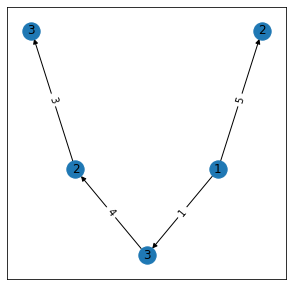

where: [0, 1, 2, 4, 6, 8, 9, 10, 11, 12, 14, 16, 17, 19, 22, 23, 27, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 52, 54, 55, 57, 58, 59, 61, 62, 64, 65, 68, 69, 70, 71, 73, 74, 76, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 181, 183, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 199, 200, 201, 202, 203, 204, 205, 206, 207, 210, 211, 212, 213, 215, 216, 217, 219, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 240, 242, 243, 244, 245, 247]

-----------------

t # 134
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
e 0 1 1
e 0 4 4
e 1 2 4
e 2 3 3

Support: 198


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


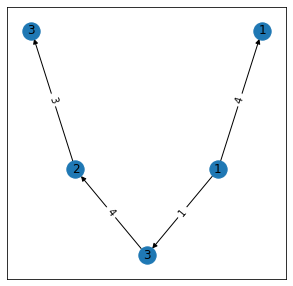

where: [0, 1, 2, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 25, 28, 29, 30, 31, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 52, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 138, 139, 140, 142, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 171, 173, 174, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 195, 196, 197, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 238, 239, 242, 243, 244, 245, 246, 247]

-----------------

t # 135
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 1
e 1 2 4
e 2 3 0

Suppor

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


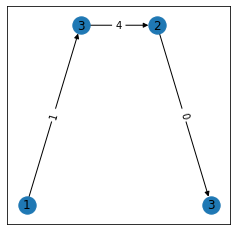

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 137, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 170, 171, 172, 173, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 198, 200, 201, 202, 204, 205, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247]

-----------------

t # 136
v 0 1

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


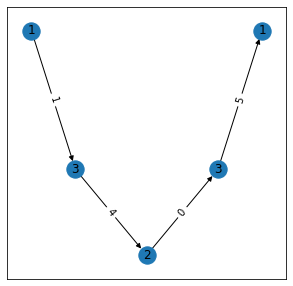

where: [0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 33, 37, 38, 39, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 137, 138, 140, 141, 142, 144, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 162, 164, 165, 166, 167, 170, 171, 173, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 198, 200, 201, 202, 205, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 238, 239, 240, 241, 244, 245, 247]

-----------------

t # 137
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 1
e 1 2 4
e 2 3 5

Support: 210


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


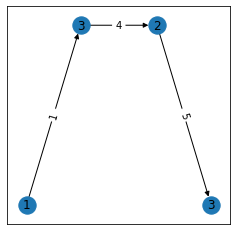

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 39, 40, 41, 43, 44, 45, 47, 48, 49, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 237, 238, 239, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 138
v 0

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


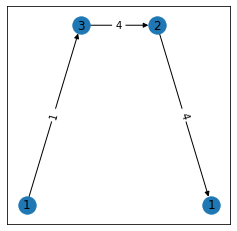

where: [0, 1, 2, 4, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 27, 28, 29, 31, 32, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 246, 247]

------

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


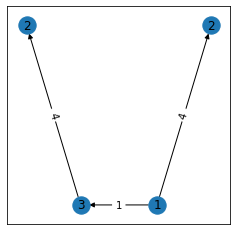

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 237, 238, 239, 240, 242, 243, 245, 246, 247]

--

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


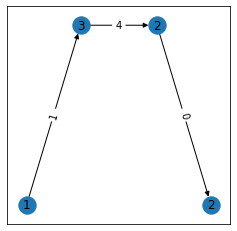

where: [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 35, 36, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 76, 78, 79, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 117, 119, 120, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 143, 146, 147, 148, 150, 151, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 169, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 200, 201, 203, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 224, 226, 227, 228, 229, 230, 233, 234, 235, 237, 240, 242, 243, 244, 245, 247]

-----------------

t # 141
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 1
e 1 2 4
e 2 3 5

Support: 209


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


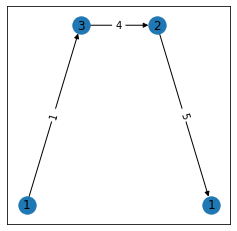

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 70, 71, 73, 74, 75, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 135, 136, 138, 139, 140, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 236, 237, 240, 241, 242, 243, 244, 245, 246, 247]

-----------------

t # 142
v 0 1


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


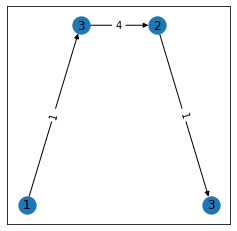

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 199, 200, 201, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 223, 224, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247]

-----------------


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


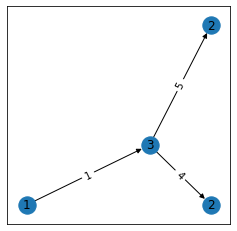

where: [0, 1, 2, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 149, 150, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 170, 171, 173, 174, 177, 178, 179, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 200, 201, 204, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 236, 237, 240, 243, 244, 245, 246, 247]

-----------------

t # 144
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 1
e 0 3 3
e 1 2 4

Sup

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


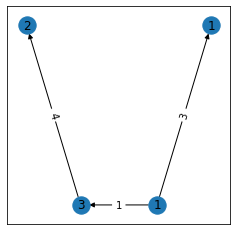

where: [0, 1, 2, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 41, 42, 43, 45, 46, 47, 49, 52, 54, 55, 57, 58, 59, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 138, 140, 141, 142, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 170, 171, 172, 173, 175, 176, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 203, 204, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 145
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 1
e 1 2 4
e 2 3 2

Support: 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


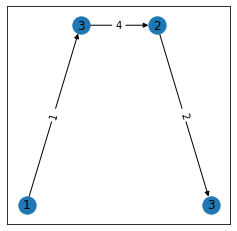

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 19, 22, 23, 24, 28, 29, 30, 31, 33, 35, 37, 38, 39, 41, 42, 43, 45, 47, 49, 54, 55, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 71, 72, 73, 76, 77, 78, 79, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 121, 122, 124, 125, 126, 127, 128, 129, 130, 134, 136, 137, 138, 139, 140, 141, 145, 146, 147, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 162, 163, 164, 166, 170, 173, 174, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 210, 211, 212, 213, 215, 216, 218, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 240, 242, 243, 244, 245, 247]

-----------------

t # 146
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 1
e 1 2 4
e 1 3 5

Support: 201


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


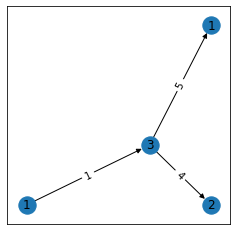

where: [0, 1, 2, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 27, 29, 30, 31, 32, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 89, 90, 91, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 171, 173, 174, 176, 177, 178, 179, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 204, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 237, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 147
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 4
e 2 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


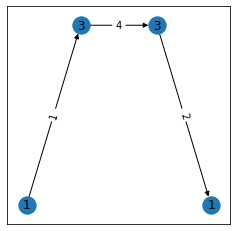

where: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


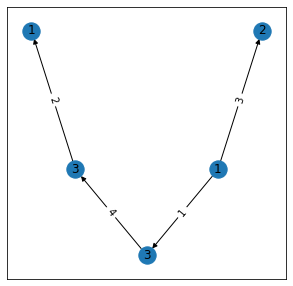

where: [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 24, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 54, 55, 56, 57, 58, 60, 61, 62, 64, 65, 67, 70, 71, 72, 73, 76, 77, 78, 79, 81, 82, 83, 84, 85, 87, 88, 89, 90, 92, 94, 95, 97, 99, 100, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 116, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 147, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 166, 167, 171, 173, 175, 176, 177, 178, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 234, 237, 240, 241, 242, 243, 244, 245, 247]

-----------------

t # 149
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 1 2 4
e 2 3 2
e 2 4 3

Support: 187


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


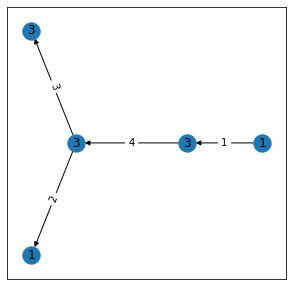

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 100, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 170, 171, 173, 176, 177, 178, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 236, 239, 240, 241, 242, 243, 244, 245, 246, 247]

-----------------

t # 150
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 0 4 2
e 1 2 4
e 2 3 2

Support: 185


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


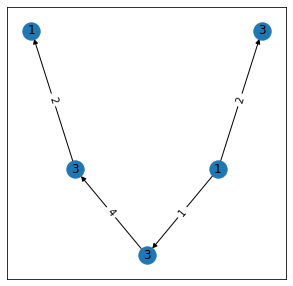

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 18, 21, 23, 24, 26, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 53, 54, 55, 56, 58, 60, 61, 62, 64, 67, 70, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 127, 128, 129, 130, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 170, 171, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 200, 201, 203, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 234, 235, 236, 238, 240, 241, 242, 243, 245, 246, 247]

-----------------

t # 151
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 1 2 4
e 2 3 1

Support: 218


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


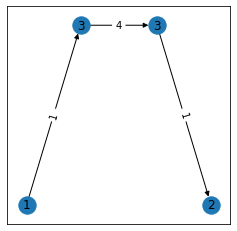

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 238, 240, 242, 243, 244, 245, 246, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


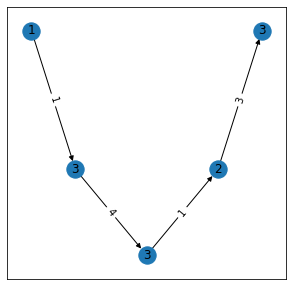

where: [0, 1, 2, 4, 5, 6, 8, 11, 12, 13, 14, 16, 17, 19, 20, 22, 23, 24, 27, 28, 29, 30, 31, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 145, 146, 147, 148, 150, 151, 153, 154, 156, 158, 159, 160, 161, 163, 164, 166, 167, 170, 171, 173, 174, 175, 176, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 199, 200, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 222, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 238, 240, 243, 245, 246, 247]

-----------------

t # 153
v 0 1
v 1 3
v 2 3
v 3 2
v 4 2
e 0 1 1
e 1 2 4
e 2 3 1
e 3 4 2

Support: 191


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


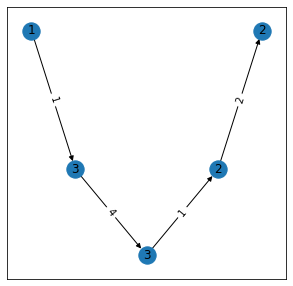

where: [0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 16, 17, 22, 23, 24, 26, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 57, 58, 59, 61, 62, 63, 64, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 164, 166, 167, 168, 170, 171, 173, 175, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 203, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 154
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 0 4 2
e 1 2 4
e 2 3 1

Support: 180


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


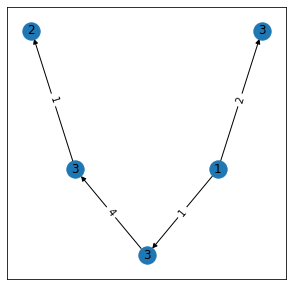

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 22, 23, 24, 26, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 88, 89, 90, 92, 93, 94, 95, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 115, 117, 118, 119, 120, 121, 123, 124, 125, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 145, 146, 147, 148, 149, 150, 153, 154, 155, 156, 158, 159, 160, 161, 163, 164, 165, 168, 170, 171, 173, 175, 176, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 200, 201, 204, 205, 207, 208, 210, 211, 212, 213, 214, 215, 216, 219, 222, 223, 225, 226, 227, 228, 229, 230, 233, 234, 236, 238, 243, 244, 245, 247]

-----------------

t # 155
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 1 2 4
e 1 3 4

Support: 208


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


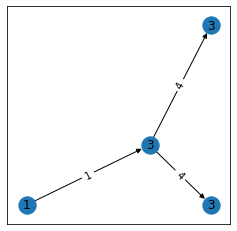

where: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 33, 35, 36, 37, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 175, 176, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 156
v 0 1
v 1 3
v 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


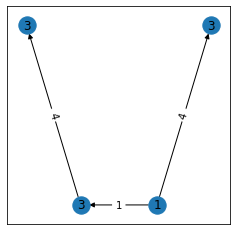

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 238, 240, 241, 242, 243, 244, 245, 247]

--------------

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


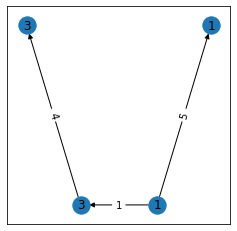

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 169, 171, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 23

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


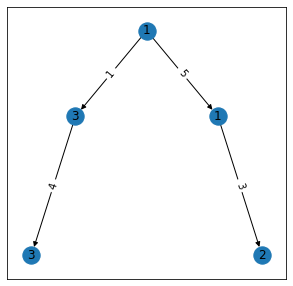

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 35, 36, 39, 40, 41, 43, 44, 45, 46, 47, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 138, 139, 141, 142, 143, 144, 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 166, 167, 169, 171, 173, 175, 177, 179, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 225, 226, 227, 229, 230, 231, 233, 234, 235, 236, 238, 242, 243, 244, 245, 247]

-----------------

t # 159
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 0 3 5
e 1 2 4
e 3 4 2

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


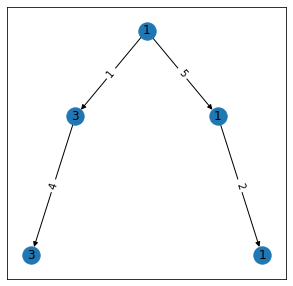

where: [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 41, 43, 45, 47, 49, 54, 55, 56, 58, 59, 61, 62, 64, 65, 67, 69, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 149, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 171, 173, 176, 177, 181, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 225, 226, 227, 228, 229, 230, 234, 236, 240, 243, 245, 246, 247]

-----------------

t # 160
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 0 3 5
e 1 2 4
e 3 4 1

Support: 184


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


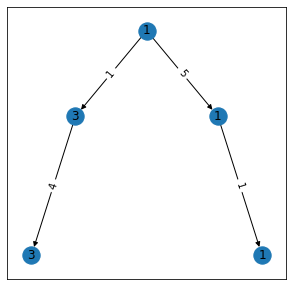

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 27, 28, 29, 30, 31, 32, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 49, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 71, 72, 73, 76, 77, 78, 80, 82, 84, 85, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 133, 134, 135, 136, 138, 139, 140, 141, 142, 145, 147, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 169, 173, 177, 178, 179, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 238, 240, 242, 243, 244, 245, 247]

-----------------

t # 161
v 0 1
v 1 3
v 2 3
v 3 1
v 4 2
e 0 1 1
e 0 3 5
e 0 4 5
e 1 2 4

Support: 184


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


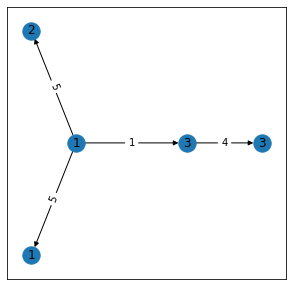

where: [0, 1, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 28, 29, 30, 31, 33, 34, 36, 38, 39, 41, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 71, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 163, 164, 166, 167, 169, 171, 175, 177, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 222, 225, 226, 227, 229, 230, 233, 234, 238, 240, 243, 244, 245, 247]

-----------------

t # 162
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 0 3 5
e 1 2 4
e 3 4 4

Support: 180


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


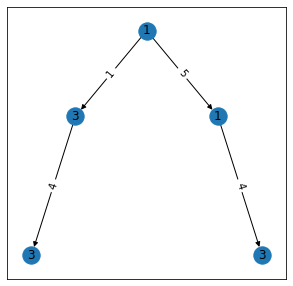

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 41, 43, 45, 47, 49, 50, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 76, 77, 78, 80, 81, 82, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 97, 99, 100, 101, 103, 104, 106, 107, 108, 109, 112, 114, 115, 117, 118, 119, 120, 123, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 171, 173, 175, 176, 177, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 222, 225, 226, 227, 228, 229, 230, 233, 234, 236, 238, 240, 243, 244, 245, 247]

-----------------

t # 163
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 0 3 3
e 1 2 4

Support: 222


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


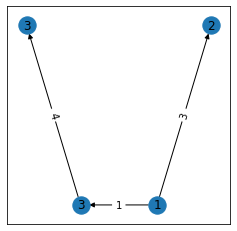

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 92, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 24

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


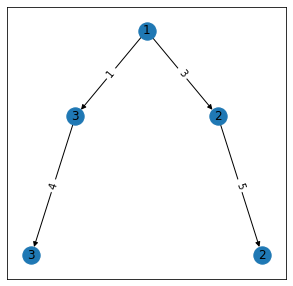

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 20, 21, 22, 24, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 92, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 176, 177, 178, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 200, 201, 203, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 223, 225, 226, 227, 228, 229, 230, 231, 234, 236, 237, 240, 241, 243, 244, 245, 247]

-----------------

t # 165
v 0 1
v 1 3
v 2 3
v 3 2
v 4 2
e 0 1 1
e 0 3 3
e 0 4 5
e 1 2 4

Support: 185


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


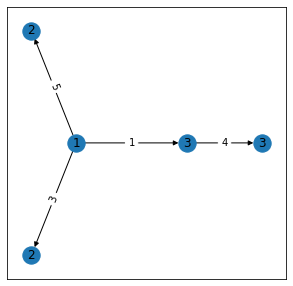

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 28, 29, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 89, 90, 92, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 125, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 144, 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 175, 176, 178, 181, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 219, 220, 223, 225, 226, 227, 228, 229, 230, 231, 232, 234, 237, 238, 240, 242, 243, 244, 245, 247]

-----------------

t # 166
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 0 3 5
e 1 2 4

Support: 223


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


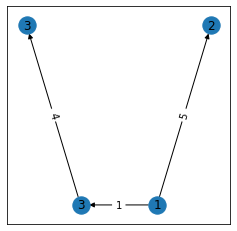

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 237, 238, 240, 242, 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


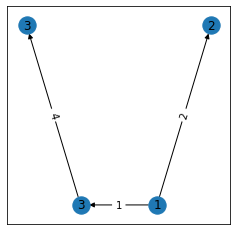

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 84, 85, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 129, 130, 132, 135, 136, 138, 139, 140, 141, 142, 145, 146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 167, 168, 169, 170, 171, 173, 175, 176, 177, 178, 180, 181, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 195, 196, 197, 199, 200, 201, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 237, 238, 240, 243, 244, 245, 247]

-----------------

t # 168
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 4
e 2 3 5

Support: 217


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


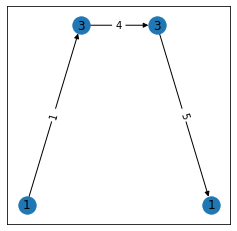

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247]



/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


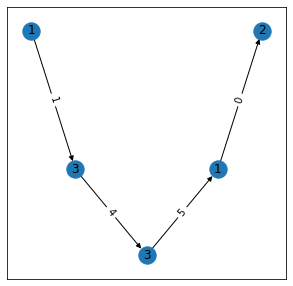

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 23, 28, 29, 30, 31, 33, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 84, 85, 89, 90, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 138, 139, 140, 141, 142, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 166, 167, 168, 170, 171, 173, 175, 177, 178, 179, 181, 183, 184, 185, 186, 188, 189, 190, 193, 194, 195, 196, 199, 200, 201, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 242, 243, 244, 245, 246, 247]

-----------------

t # 170
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 1 2 4
e 2 3 1

Support: 222


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


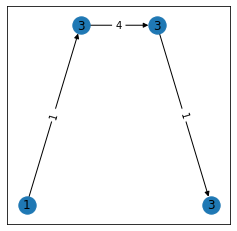

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 169, 170, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 242, 243, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


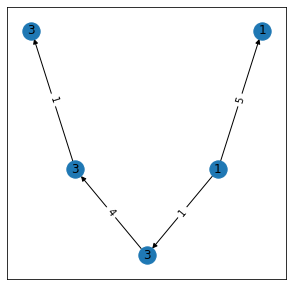

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 19, 20, 22, 23, 27, 28, 29, 30, 31, 35, 36, 38, 39, 41, 43, 45, 46, 47, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 68, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 142, 143, 145, 146, 147, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 169, 171, 175, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 225, 226, 227, 229, 230, 231, 233, 234, 235, 236, 238, 240, 243, 244, 245, 247]

-----------------

t # 172
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 4
e 2 3 3

Support: 223


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


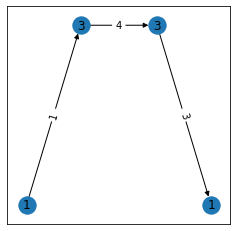

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 236, 237, 238, 240, 242,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


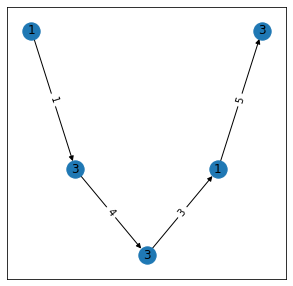

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 28, 29, 30, 31, 32, 33, 35, 36, 39, 40, 41, 43, 44, 45, 46, 47, 49, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 81, 82, 83, 84, 85, 87, 89, 90, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 170, 171, 173, 174, 176, 177, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 199, 200, 201, 204, 205, 206, 208, 209, 211, 212, 213, 214, 215, 216, 217, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 236, 237, 238, 242, 243, 244, 245, 246, 247]

-----------------

t # 174
v 0 1
v 1 3
v 2 3
v 3 1
v 4 2
e 0 1 1
e 1 2 4
e 2 3 3
e 2 4 3

Support: 180


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


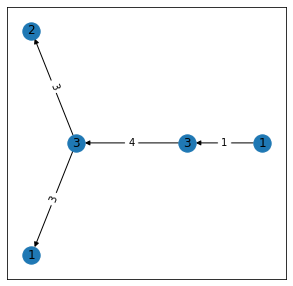

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 39, 40, 41, 43, 44, 45, 46, 47, 49, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 87, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 102, 103, 104, 105, 107, 108, 111, 112, 115, 116, 117, 118, 119, 120, 121, 123, 124, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 171, 173, 177, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 199, 200, 201, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 234, 236, 237, 238, 243, 244, 245, 246, 247]

-----------------

t # 175
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 1 2 4
e 2 3 0

Support: 209


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


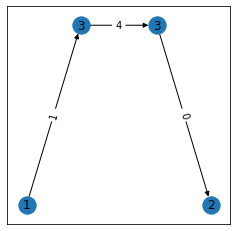

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 84, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 241, 242, 243, 244, 245, 246, 247]

-----------------

t # 176
v 0 1
v 1 3


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


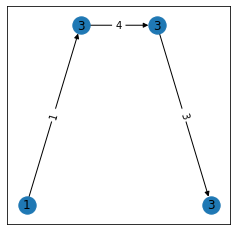

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 176, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 2

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


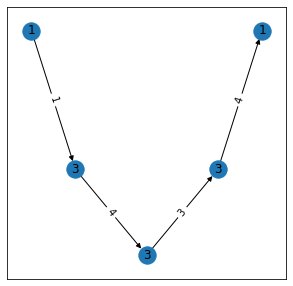

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 92, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 135, 136, 138, 140, 141, 142, 143, 144, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 170, 171, 173, 175, 176, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 222, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 241, 243, 244, 245, 246, 247]

-----------------

t # 178
v 0 1
v 1 3
v 2 3
v 3 3
v 4 1
e 0 1 1
e 1 2 4
e 2 3 3


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


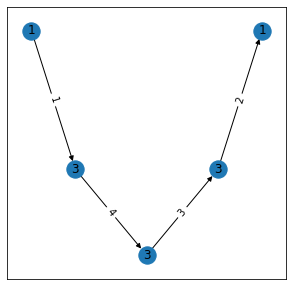

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 17, 21, 22, 23, 24, 27, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 78, 79, 80, 82, 83, 85, 86, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 124, 125, 127, 128, 129, 130, 135, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 158, 159, 161, 162, 163, 164, 165, 166, 168, 170, 171, 176, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 194, 195, 196, 197, 198, 199, 200, 201, 203, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 239, 241, 243, 244, 245, 246, 247]

-----------------

t # 179
v 0 1
v 1 3
v 2 3
v 3 3
v 4 1
e 0 1 1
e 1 2 4
e 2 3 3
e 2 4 5

Support: 196


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


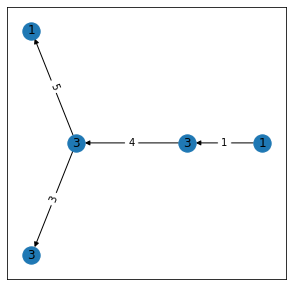

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 15, 16, 17, 19, 20, 21, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 124, 125, 127, 129, 130, 134, 135, 136, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 169, 170, 171, 173, 175, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 234, 235, 236, 237, 238, 239, 243, 244, 245, 246, 247]

-----------------

t # 180
v 0 1
v 1 3
v 2 3
v 3 3
v 4 1
e 0 1 1
e 0 4 5
e 1 2 4
e 2 3 3

Support

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


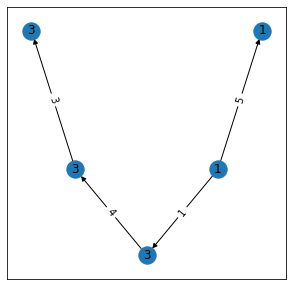

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 23, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 163, 164, 166, 167, 169, 171, 173, 177, 178, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 204, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 236, 238, 241, 243, 244, 245, 246, 247]

-----------------

t # 181
v 0 1
v 1 3
v 2 3
v 3 3
v 4 2
e 0 1 1
e 0 4 3
e 1 2 4
e 2 3 3

Support: 184


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


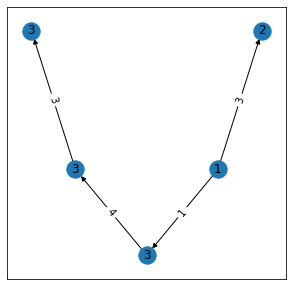

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 21, 24, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 92, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 124, 125, 127, 129, 130, 135, 136, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 166, 167, 171, 173, 176, 177, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 205, 206, 207, 208, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 234, 237, 240, 241, 242, 243, 244, 245, 247]

-----------------

t # 182
v 0 1
v 1 3
v 2 3
v 3 3
v 4 1
e 0 1 1
e 1 2 4
e 2 3 3
e 3 4 0

Support: 205


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


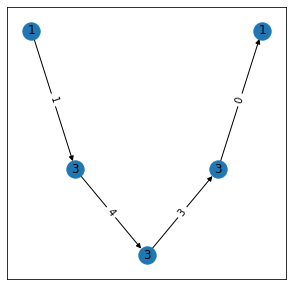

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 52, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 176, 177, 178, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 246, 247]

-----------------

t # 183
v 0 1
v 1 3
v 2 3
v 3 3
v 4 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


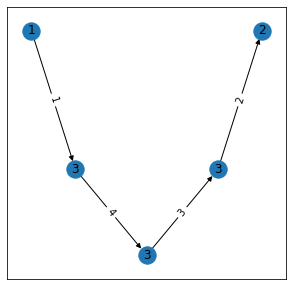

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 21, 22, 24, 25, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 168, 170, 171, 173, 176, 177, 178, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 219, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 236, 238, 241, 243, 244, 245, 246, 247]

-----------------

t # 184
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 4
e 2 3 0

Support: 231


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


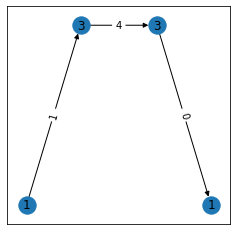

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


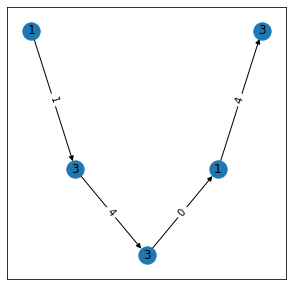

where: [0, 1, 2, 3, 4, 6, 7, 8, 11, 12, 13, 14, 16, 17, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 33, 35, 36, 37, 39, 40, 41, 43, 44, 45, 46, 47, 49, 50, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 67, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 84, 85, 87, 88, 89, 90, 91, 92, 94, 95, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 138, 140, 141, 142, 144, 145, 146, 147, 148, 150, 151, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 169, 170, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 216, 217, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 243, 244, 245, 246, 247]

-----------------

t # 186
v 0 1
v 1 3
v 2 3
v 3 1
v 4 2
e 0 1 1
e 1 2 4
e 2 3 0
e 3 4 4

Support: 195


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


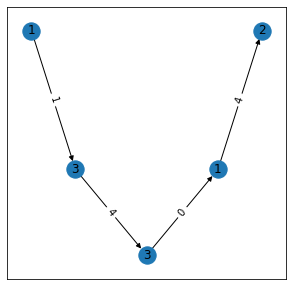

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17, 20, 23, 25, 27, 28, 29, 30, 31, 33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 144, 146, 147, 148, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 169, 170, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 222, 225, 226, 227, 228, 229, 230, 231, 233, 234, 236, 237, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 187
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 1 2 4
e 2 3 0
e 2 4 3

Support: 197

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


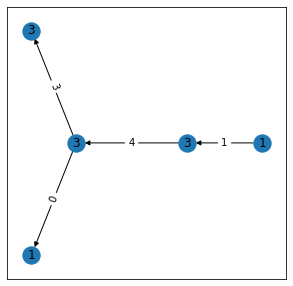

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 67, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 144, 145, 146, 147, 148, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 170, 173, 175, 176, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 243, 244, 245, 246, 247]

-----------------

t # 188
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 0 4 5
e 1 2 4
e 2 3 0

Supp

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


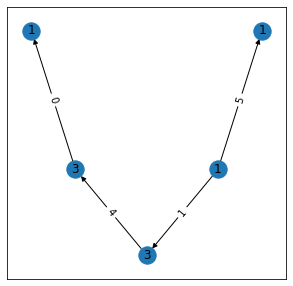

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 23, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 69, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 138, 139, 140, 141, 142, 144, 145, 147, 148, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 169, 171, 173, 177, 179, 181, 183, 184, 185, 186, 188, 189, 190, 191, 194, 195, 196, 197, 198, 199, 200, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 219, 220, 223, 225, 226, 227, 228, 229, 230, 231, 234, 236, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 189
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 1 2 4
e 2 3 0
e 3 4 5

Support: 182


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


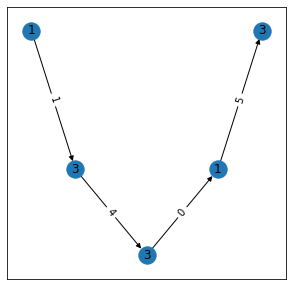

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 16, 17, 19, 20, 23, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 85, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 114, 116, 117, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 132, 134, 135, 138, 140, 141, 142, 144, 145, 146, 147, 148, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 175, 177, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 236, 238, 243, 244, 245, 246, 247]

-----------------

t # 190
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 0 4 5
e 1 2 4
e 2 3 0

Support: 186


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


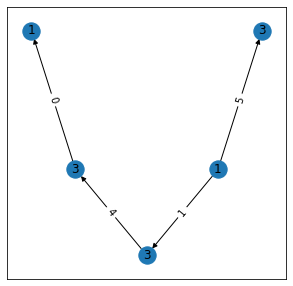

where: [0, 1, 2, 4, 6, 7, 8, 10, 12, 13, 14, 16, 17, 19, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 54, 55, 57, 58, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 88, 90, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 175, 176, 177, 178, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 203, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 223, 225, 226, 227, 229, 230, 231, 234, 236, 237, 239, 243, 244, 245, 246, 247]

-----------------

t # 191
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 0 4 3
e 1 2 4
e 2 3 0

Support: 196


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


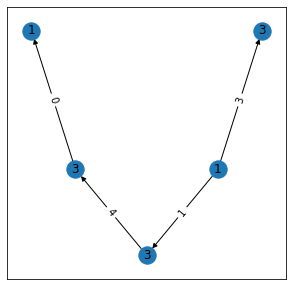

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 19, 22, 23, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 85, 87, 88, 89, 90, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 144, 145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 170, 171, 173, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 193, 194, 195, 196, 197, 199, 200, 201, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 238, 239, 240, 243, 244, 245, 246, 247]

-----------------

t # 192
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 4
e 2 3 1

Support: 226


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


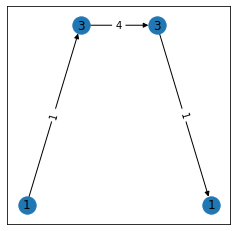

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


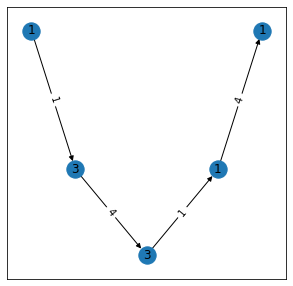

where: [0, 1, 2, 3, 4, 6, 8, 11, 12, 14, 15, 16, 17, 19, 21, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 54, 55, 57, 58, 59, 61, 62, 64, 67, 68, 69, 70, 71, 73, 76, 77, 78, 79, 81, 82, 83, 85, 87, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 147, 148, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 170, 171, 173, 176, 177, 178, 180, 181, 183, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 206, 207, 208, 211, 212, 213, 214, 215, 216, 217, 219, 220, 225, 226, 227, 228, 229, 230, 233, 234, 235, 237, 238, 240, 242, 243, 245, 246, 247]

-----------------

t # 194
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 1 2 4
e 2 3 1
e 2 4 3

Support: 183


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


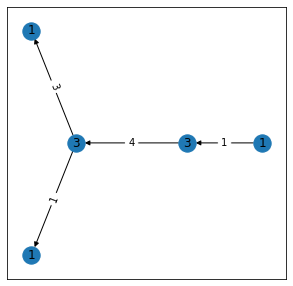

where: [0, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 53, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 89, 90, 92, 93, 94, 95, 96, 97, 99, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 147, 148, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 162, 164, 166, 167, 168, 169, 170, 171, 173, 176, 177, 178, 179, 180, 181, 183, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200, 201, 204, 206, 207, 208, 209, 210, 211, 213, 215, 216, 217, 219, 223, 225, 226, 227, 228, 229, 230, 231, 234, 236, 237, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 195
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 1
e 1 2 4
e 2 3 1
e 2 4 3

Support: 182


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


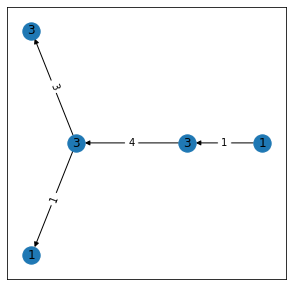

where: [0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 14, 15, 16, 17, 19, 20, 21, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 53, 54, 55, 56, 57, 58, 59, 61, 64, 66, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 81, 82, 83, 85, 86, 87, 89, 90, 91, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 135, 136, 138, 140, 141, 142, 144, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 170, 171, 173, 176, 177, 178, 180, 181, 183, 185, 187, 188, 189, 190, 191, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 207, 209, 210, 211, 212, 213, 214, 216, 217, 220, 225, 226, 227, 229, 230, 231, 233, 234, 235, 236, 237, 238, 242, 243, 244, 245, 246, 247]

-----------------

t # 196
v 0 1
v 1 3
v 2 3
v 3 1
v 4 2
e 0 1 1
e 0 4 5
e 1 2 4
e 2 3 1

Support: 190


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


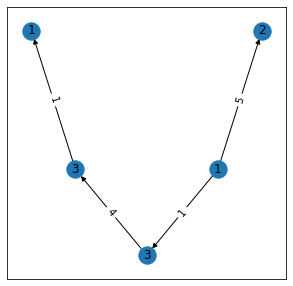

where: [0, 1, 2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 27, 28, 29, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 53, 54, 55, 56, 57, 58, 59, 61, 62, 64, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 81, 83, 85, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 173, 175, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 223, 225, 226, 227, 228, 229, 230, 231, 232, 234, 237, 238, 240, 242, 243, 245, 246, 247]

-----------------

t # 197
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 1 2 4
e 2 3 0

Support: 192


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


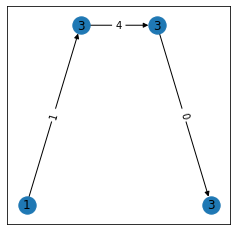

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17, 19, 20, 23, 24, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 97, 99, 100, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 176, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 199, 201, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 219, 223, 225, 226, 227, 228, 229, 230, 231, 234, 235, 236, 237, 238, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 198
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 1 2 4
e 2 3 5

Support: 206


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


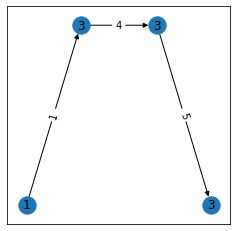

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 57, 58, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 90, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 173, 175, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 222, 223, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 238, 239, 240, 243, 244, 245, 246, 247]

-----------------

t # 199
v 0 1
v 1 3
v 2 3
v 3 2
e 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


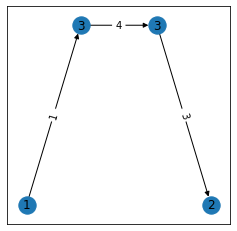

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 175, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


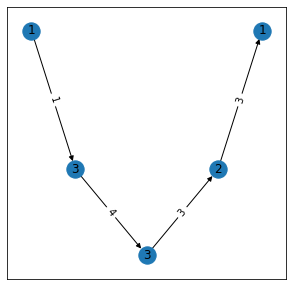

where: [0, 1, 2, 3, 4, 6, 8, 9, 10, 12, 13, 14, 16, 17, 19, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 87, 88, 89, 90, 92, 93, 94, 95, 97, 99, 100, 102, 103, 105, 106, 107, 108, 109, 111, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 135, 136, 138, 139, 140, 141, 142, 143, 146, 147, 149, 150, 152, 153, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 170, 171, 173, 175, 177, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 213, 215, 216, 217, 219, 220, 224, 225, 226, 227, 228, 229, 230, 233, 234, 236, 237, 238, 243, 244, 245, 246, 247]

-----------------

t # 201
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 1 2 4
e 2 3 3
e 3 4 1

Support: 182


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


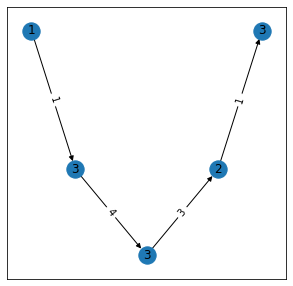

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17, 19, 22, 24, 25, 28, 29, 30, 31, 32, 33, 35, 36, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 71, 73, 76, 77, 78, 79, 80, 81, 82, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 171, 173, 177, 181, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 216, 217, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 202
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 0 4 2
e 1 2 4
e 2 3 3

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


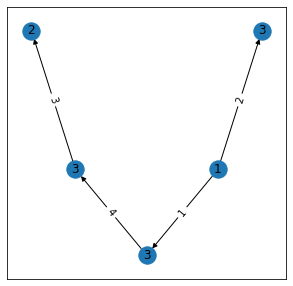

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 53, 54, 55, 57, 58, 59, 61, 62, 63, 64, 65, 68, 69, 71, 72, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 134, 136, 140, 141, 142, 143, 145, 146, 147, 149, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 169, 170, 171, 173, 175, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 236, 238, 243, 245, 246, 247]

-----------------

t # 203
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 0 4 3
e 1 2 4
e 2 3 3

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


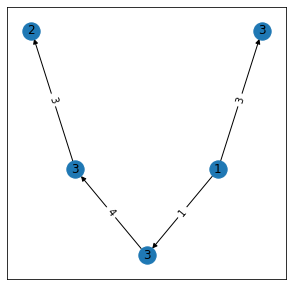

where: [0, 1, 2, 3, 4, 5, 6, 8, 12, 13, 14, 16, 17, 18, 21, 22, 25, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 41, 42, 43, 45, 46, 47, 49, 50, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 107, 108, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 141, 142, 145, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 177, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 234, 235, 236, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 204
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 1 2 4
e 2 3 3
e 3 4 2

Support: 196


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


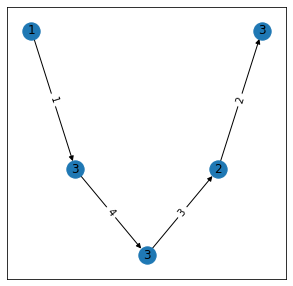

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 26, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 143, 145, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 169, 170, 171, 173, 175, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 236, 237, 238, 243, 244, 245, 247]

-----------------

t # 205
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 1 2 4
e 2 3 3
e 3 4 2

Support: 1

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


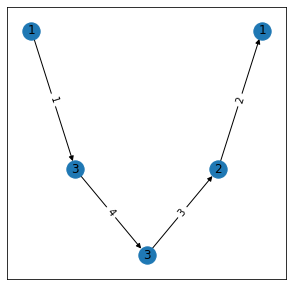

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 19, 20, 22, 23, 24, 25, 28, 29, 30, 31, 35, 36, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 139, 140, 141, 142, 145, 146, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 168, 169, 170, 171, 173, 177, 181, 183, 184, 185, 186, 188, 189, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 236, 237, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 206
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 0 4 5
e 1 2 4
e 2 3 3

Support: 186


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


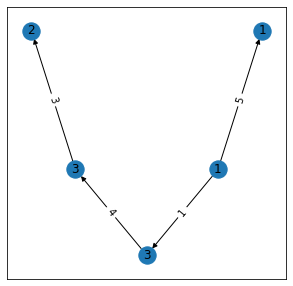

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 23, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 169, 171, 173, 175, 177, 181, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 233, 234, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 207
v 0 1
v 1 3
v 2 3
v 3 2
v 4 2
e 0 1 1
e 1 2 4
e 2 3 3
e 3 4 0

Support: 191


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


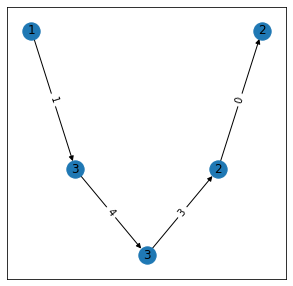

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 22, 24, 25, 29, 30, 31, 32, 33, 35, 36, 39, 41, 42, 43, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 88, 89, 90, 91, 93, 94, 95, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 140, 141, 142, 143, 145, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 169, 170, 171, 173, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 236, 237, 238, 240, 243, 244, 245, 246, 247]

-----------------

t # 208
v 0 1
v 1 3
v 2 3
v 3 2
v 4 3
e 0 1 1
e 1 2 4
e 2 3 3
e 3 4 3

Support: 181


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


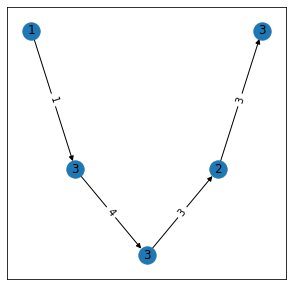

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 135, 136, 138, 139, 140, 141, 142, 143, 146, 147, 149, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 170, 173, 175, 177, 178, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 223, 224, 226, 227, 228, 229, 230, 233, 234, 236, 238, 240, 243, 245, 246, 247]

-----------------

t # 209
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 1 2 4
e 2 3 4

Support: 214


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


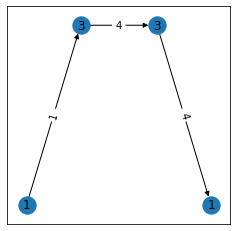

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 223, 225, 226, 227, 228, 229, 230, 231, 233, 234, 236, 238, 240, 241, 242, 243, 244, 245, 246, 247]

-----------------


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


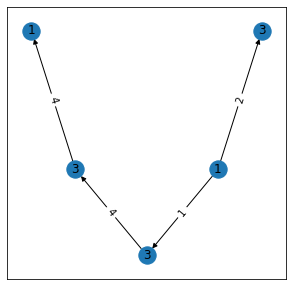

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 16, 17, 18, 21, 23, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 195, 196, 197, 198, 200, 201, 202, 203, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 223, 226, 227, 228, 229, 230, 231, 234, 236, 238, 240, 241, 242, 243, 245, 247]

-----------------

t # 211
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 1
e 1 2 4
e 1 4 5
e 2 3 4

Support: 180


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


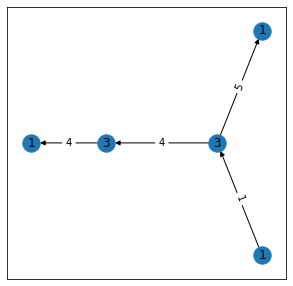

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 39, 40, 41, 43, 45, 46, 47, 49, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 147, 148, 150, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 177, 178, 179, 180, 181, 183, 184, 187, 188, 189, 190, 191, 193, 195, 196, 197, 200, 201, 204, 205, 207, 210, 211, 212, 213, 214, 215, 216, 217, 219, 223, 225, 226, 227, 228, 229, 230, 233, 234, 238, 240, 241, 242, 243, 244, 245, 247]

-----------------

t # 212
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 1
e 0 3 2
e 1 2 4

Support: 206


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


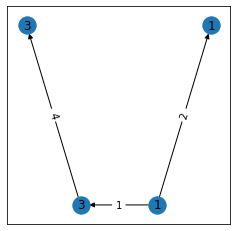

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 87, 89, 90, 91, 93, 94, 95, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 200, 201, 202, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 223, 224, 225, 226, 227, 229, 230, 231, 233, 234, 235, 238, 242, 243, 244, 245, 247]

-----------------

t # 213
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


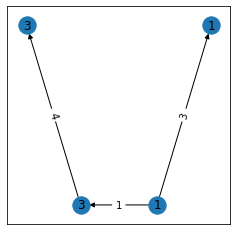

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 13, 14, 16, 17, 18, 19, 20, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 50, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 83, 84, 85, 87, 89, 90, 92, 94, 95, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 171, 173, 175, 177, 178, 179, 181, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 200, 205, 206, 209, 210, 211, 212, 213, 215, 217, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 236, 238, 240, 241, 243, 245, 247]

-----------------

t # 214
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 0 3 2
e 1 2 4

Support: 228


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


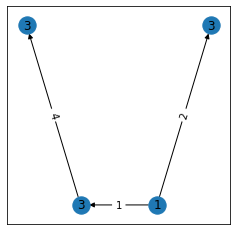

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236,

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


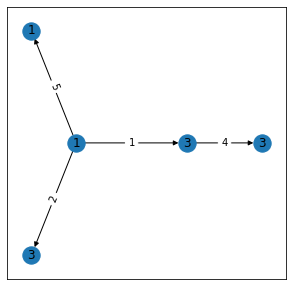

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 21, 23, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 45, 47, 48, 49, 50, 53, 54, 55, 56, 58, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 169, 171, 173, 175, 176, 177, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 222, 223, 225, 226, 227, 228, 229, 230, 233, 234, 238, 243, 244, 245, 246, 247]

-----------------

t # 216
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 1 2 4
e 2 3 5

Support: 213


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


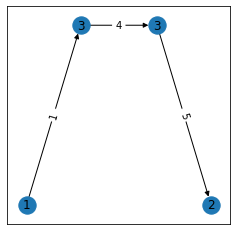

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 169, 170, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 240, 243, 244, 245, 246, 247]

-----------------



/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


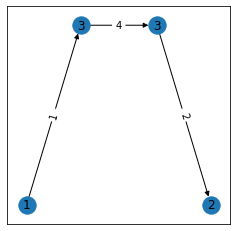

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 169, 171, 173, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 236, 237, 238, 239, 240, 242, 243, 244, 245

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


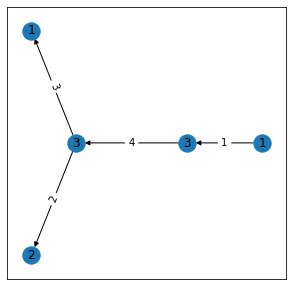

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 82, 83, 85, 87, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 137, 138, 140, 141, 143, 144, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 160, 161, 163, 164, 166, 167, 169, 171, 173, 176, 177, 179, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 236, 237, 238, 243, 244, 245, 246, 247]

-----------------

t # 219
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 1
e 0 4 5
e 1 2 4
e 2 3 2

Support: 183


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


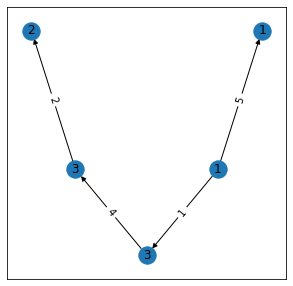

where: [0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 22, 23, 28, 29, 30, 31, 32, 35, 36, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 69, 71, 73, 76, 77, 78, 79, 80, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 135, 136, 138, 139, 140, 141, 144, 145, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 166, 169, 171, 173, 175, 177, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 224, 225, 226, 227, 228, 229, 230, 231, 234, 236, 240, 243, 244, 245, 246, 247]

-----------------

t # 220
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 1
e 0 3 4
e 1 2 4

Support: 202


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


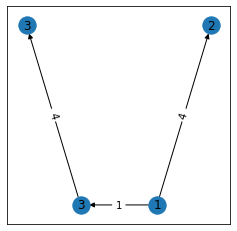

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 140, 141, 142, 143, 146, 147, 148, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 238, 241, 243, 245, 246, 247]

-----------------

t # 221
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 1 2 4
e 2 3 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


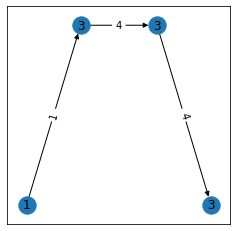

where: [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 133, 134, 135, 136, 138, 139, 140, 141, 142, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 170, 171, 173, 175, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 236, 239, 240, 243, 244, 245, 246, 247]

-----------------

t # 222
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 0 3 

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


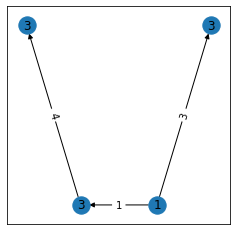

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 23

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


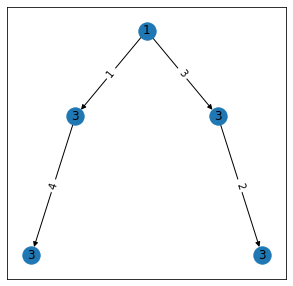

where: [0, 1, 2, 3, 4, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 54, 55, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 71, 72, 73, 74, 76, 77, 78, 79, 80, 82, 84, 87, 88, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 126, 127, 128, 129, 130, 134, 135, 136, 138, 139, 140, 141, 142, 144, 146, 147, 148, 150, 151, 153, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 167, 168, 169, 170, 171, 173, 175, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 200, 202, 205, 207, 209, 210, 211, 212, 213, 215, 218, 219, 222, 223, 225, 226, 227, 228, 229, 230, 233, 234, 235, 240, 241, 243, 245, 246, 247]

-----------------

t # 224
v 0 1
v 1 3
v 2 3
v 3 3
v 4 1
e 0 1 1
e 0 3 3
e 1 2 4
e 3 4 2

Support: 190


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


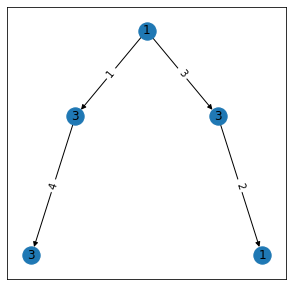

where: [0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 52, 54, 55, 56, 57, 59, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 84, 87, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 170, 171, 172, 173, 175, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 200, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 234, 238, 240, 241, 242, 243, 245, 246, 247]

-----------------

t # 225
v 0 1
v 1 3
v 2 3
v 3 3
v 4 2
e 0 1 1
e 0 3 3
e 1 2 4
e 3 4 4

Support: 195


/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


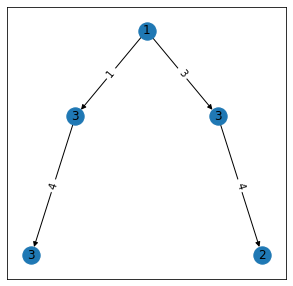

where: [0, 1, 2, 4, 5, 6, 8, 9, 12, 13, 14, 16, 17, 19, 22, 23, 24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 82, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 219, 220, 223, 224, 225, 226, 228, 229, 230, 233, 234, 235, 238, 239, 240, 242, 243, 244, 245, 246, 247]

-----------------

t # 226
v 0 1
v 1 3
v 2 3
v 3 3
v 4 2
e 0 1 1
e 0 3 3
e 1 2 4
e 3 4 0

Support: 201

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


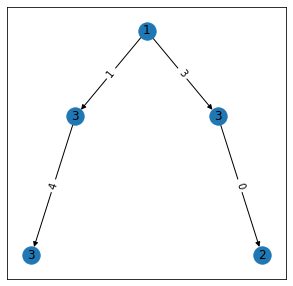

where: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 90, 91, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 175, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 204, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 219, 220, 222, 223, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 238, 239, 240, 242, 243, 245, 247]

-----------------

t # 227
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 1
e 0 3 5
e 1 2 4

Su

/Users/tangting/Project/gSpan-master/gspan_mining/ceb_gspan.py:432: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


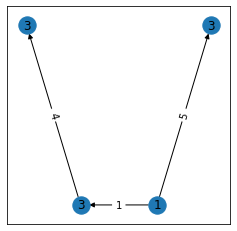

where: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 112, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 

: 

In [1]:
from gspan_mining.config import parser
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
from random import random
import sys

from gspan_mining.config import parser
from gspan_mining.ceb_gspan import gSpan

import numpy as np
import pandas as pd


import random 
def main(FLAGS=None):
    """Run gSpan."""

    if FLAGS is None:
        FLAGS, _ = parser.parse_known_args(args=["graphdata/graph.data.5"])

    if not os.path.exists(FLAGS.database_file_name):
        print('{} does not exist.'.format(FLAGS.database_file_name))
        sys.exit()

    graph_dict = {"group_id":"graph_id","vertex_id":"id","edge_src":"src_id","edge_dst":"dst_id","origin_id":"origin_id"}
    # graph_dict =  {"group_id":"graph_id","vertex_id":"id","edge_src":"src","edge_dst":"dst"}
    gs = gSpan(
        database_file_name=FLAGS.database_file_name,
        min_support=FLAGS.min_support,
        min_num_vertices=FLAGS.lower_bound_of_num_vertices,
        max_num_vertices=FLAGS.upper_bound_of_num_vertices,
        max_ngraphs=FLAGS.num_graphs,
        is_undirected=(not FLAGS.directed),
        verbose=FLAGS.verbose,
        visualize=FLAGS.plot,
        where=FLAGS.where,
        graph_dict = graph_dict
    )

    gs.run()
    gs.time_stats()

    
    return gs


if __name__ == '__main__':
    args_str = '--min_support 180 --directed True --lower_bound_of_num_vertices 4 --plot True --where True graphdata/'
    FLAGS, _ = parser.parse_known_args(args=args_str.split())
    main(FLAGS)


In [17]:
1

1

NameError: name 'graph_dict' is not defined

vertexes

get_forward_root_edges result

In [1]:
edges

NameError: name 'edges' is not defined